# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, see [this forum post](https://carnd-forums.udacity.com/cq/viewquestion.action?spaceKey=CAR&id=29496372&questionTitle=finding-lanes---import-cv2-fails-even-though-python-in-the-terminal-window-has-no-problem-with-import-cv2) for more troubleshooting tips.**  

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

import glob


This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


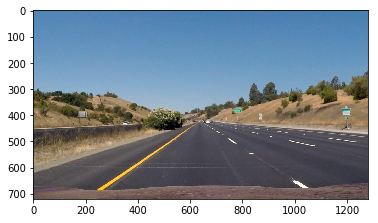

In [2]:
#reading in an image
image = mpimg.imread('test_images/straight_lines1.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image[520:580,:])  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
img2=np.copy(image)
img2lines = cv2.line(img2[300:,150:850],(24,99),(92,500),255)
plt.imshow(image)

#cv2.line(img2[300:,150:850],(24,99),(92,500))
#img2lines = cv2.line(img2[300:,150:850],(24,99),(92,500),255)

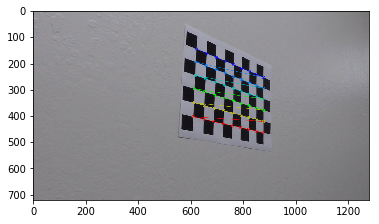

In [3]:
# Using a checkerboard image to perform undistort functions
# Read in an image
img = cv2.imread('/camera_cal/calibration1.jpg')
import glob

images = glob.glob('./camera_cal/calibration*.jpg')
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y
objpoints = [] # 3D points in real world space 
imgpoints= []  # 2D points in image plane
objp = np.zeros((ny*nx,3),np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) # x and y coordinates

#look at distorted calibration image and detect corners of board using findChessboard Corners
plt1 = plt.figure(figsize=(41,41))  
i=0
for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret==True:
        imgpoints.append(corners)
        objpoints.append(objp)
        img=cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        #plt.imshow(img)
        legends = plt1.add_subplot(10,5,i+1) 
        legends.imshow(img)
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
        undist = cv2.undistort(img, mtx, dist, None, mtx)
        legends = plt1.add_subplot(10,5,i+1) 
        legends.imshow(undist)
plt.show()        
#ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

#undist = cv2.undistort(img, mtx, dist, None, mtx)
        
        

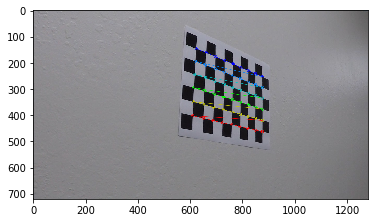

In [4]:
plt.imshow(img)


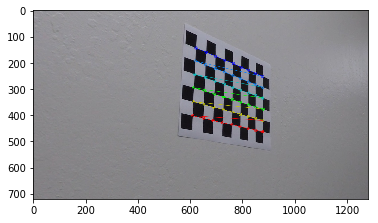

In [5]:
undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undist)
# processing on images:


def image_undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

def collect_base_points(img):
    #getting x coordinate starting pts
    histogram1 = np.sum(image[image.shape[0]-100:,:], axis=0)
    #plt.plot(histogram)
    midpoint = np.int(histogram1.shape[0]/2)
    leftx_base = np.argmax(histogram1[:midpoint,1])
    rightx_base = np.argmax(histogram1[midpoint:,1])+midpoint
    # getting y coordinate starting pts
    
    #Plotting a histogram from the bottom of the image:
    histogramy = np.sum(img[img.shape[0]-100:,:], axis=1)
    #plt.plot(histogram)
    ybase = np.argmax(histogramy[::-1,1])
    
    # generating region of interest
    upperxoffset = 55
    lowerxoffset= 70 
    imy=img.shape[0]
    # Returning source points
    roi1 = (leftx_base-lowerxoffset, imy-ybase )
    roi2 = (midpoint-upperxoffset, imy-270 )
    roi3 = (midpoint +upperxoffset, imy-270 ) 
    roi4 = (rightx_base+lowerxoffset, imy-ybase )
    src = np.float32((roi1,roi2,roi3,roi4))
    
    # Returning destination points
    warp_offsetx=550
    warp_offsety=220
    destroi1=(midpoint-warp_offsetx,imy)
    destroi2=(midpoint-warp_offsetx,imy-4*warp_offsety)
    destroi3=(midpoint+warp_offsetx,imy-4*warp_offsety)
    destroi4=(midpoint+warp_offsetx,imy)
    dst = np.float32((destroi1,destroi2,destroi3,destroi4))
    return src,dst

    
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    #Threshold light values
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= 60) & (l_channel <= 255)] = 1
    
    
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    #color_binary = np.dstack(( l_binary, sxbinary, s_binary))
    color_binary = np.zeros_like(sxbinary)
    color_binary[((l_binary == 1) & (s_binary == 1) | (sxbinary==1))] = 1
    color_binary = 255*np.dstack((color_binary,color_binary,color_binary)).astype('uint8')   
    return color_binary

def warp_perspective(img):
    #Compute the perspective transform, M, given source and destination points:
    img_size = (img.shape[1],img.shape[0])
    global M
    M = cv2.getPerspectiveTransform(src, dst)

    #Compute the inverse perspective transform:
    global Minv
    Minv = cv2.getPerspectiveTransform(dst, src)

    #Warp an image using the perspective transform, M:

    #warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    binary_warped = cv2.warpPerspective(pipeline(img), M, img_size, flags=cv2.INTER_LINEAR)
    return binary_warped


src,dst = collect_base_points(img)


In [6]:
def process_images(img):
    undist = image_undistort(img)
    binary_warped = warp_perspective(undist)
    histogram_lines = np.sum(binary_warped[binary_warped.shape[0]/2:,], axis=0)
    # Take a histogram of the bottom half of the image
    out_img = np.dstack((binary_warped[:,:,0], binary_warped[:,:,1], binary_warped[:,:,2]))*255

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram_lines.shape[0]/2)
    leftx_base = np.argmax(histogram_lines[:midpoint,2])-10
    rightx_base = np.argmax(histogram_lines[midpoint:,2]) + midpoint


    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix =50 #50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
    
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
    
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        #print(win_xleft_low,win_y_low,win_xleft_high,win_y_high)
        #print(win_xright_low,win_y_low,win_xright_high,win_y_high)
        # Identify the nonzero pixels in x and y within the window
    
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
    
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
    
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    #Generating x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/1280 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    
    # creating a new image with the lines drawn:

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero[:,:,0], warp_zero[:,:,1], warp_zero[:,:,2]))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
   
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(img, 1, newwarp, 0.3, 0)
    text = "Left Radius: " + left_curverad.astype('str')[:6] + 'm' + " , " + "Right Radius: " + right_curverad.astype('str')[:6] + 'm'
    cv2.putText(result,text, (200,100), cv2.FONT_HERSHEY_SIMPLEX, 1, 110,3)

    return result
#final = process_images(img)


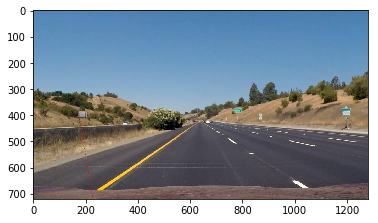

In [7]:
img = mpimg.imread('test_images/straight_lines1.jpg')
plt.imshow(img2)



33122.8045049 m 13417.4900604 m


C:\Users\medisp\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


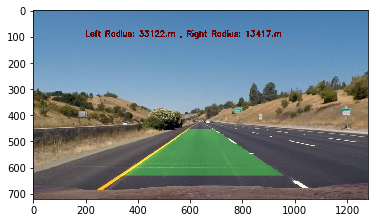

In [8]:
final = process_images(img)
plt.imshow(final)

1174.61951696 m 1216.02416989 m


C:\Users\medisp\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


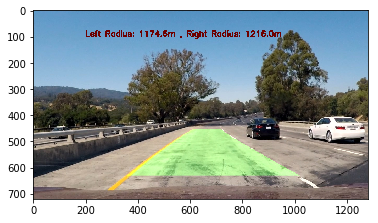

In [9]:
img = mpimg.imread('test_images/test1.jpg')
#plt.imshow(img)
plt.imshow(process_images(img))

810.215138388 m 713.075073628 m


C:\Users\medisp\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


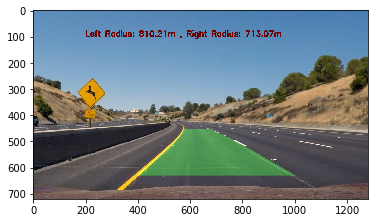

In [10]:
img = mpimg.imread('test_images/test2.jpg')
plt.imshow(process_images(img))


1344.76001068 m 1775.14041721 m


C:\Users\medisp\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


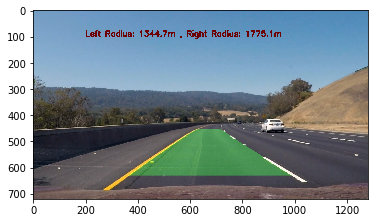

In [11]:
img = mpimg.imread('test_images/test3.jpg')
plt.imshow(process_images(img))

(720, 1280, 3)


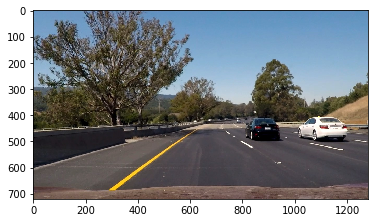

In [12]:
img = mpimg.imread('test_images/test6.jpg')
#plt.imshow(process_images(img))
'''
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
draw = Image.fromarray(process_images(img))
draw = ImageDraw.Draw(draw)
font = ImageFont.truetype("arial.ttf", 15)
draw.text((10, 10), "hello", font=font)
'''



#draw=np.asarray(draw)
#draw= cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

plt.imshow(img)
print(img.shape)

In [13]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

from moviepy.editor import VideoFileClip
from IPython.display import HTML
white_output = 'white.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_images) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

793.661274742 m 724.754167783 m
[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


  0%|                                                 | 0/1261 [00:00<?, ?it/s]

793.661274742 m 724.754167783 m


  0%|                                         | 1/1261 [00:00<05:00,  4.20it/s]

768.757806801 m 842.139571127 m


  0%|                                         | 2/1261 [00:00<04:51,  4.32it/s]

729.522949929 m 1325.58066518 m


  0%|                                         | 3/1261 [00:00<04:43,  4.44it/s]

777.64608114 m 2366.15749489 m


  0%|▏                                        | 4/1261 [00:00<04:38,  4.51it/s]

747.447071141 m 3460.42750041 m


  0%|▏                                        | 5/1261 [00:01<04:33,  4.59it/s]

770.925807843 m 1359.05420881 m


  0%|▏                                        | 6/1261 [00:01<04:34,  4.57it/s]

848.295578966 m 1508.18995987 m


  1%|▏                                        | 7/1261 [00:01<04:33,  4.59it/s]

900.351069909 m 1801.84220923 m


  1%|▎                                        | 8/1261 [00:01<04:28,  4.66it/s]

935.984059824 m 6011.51023732 m


  1%|▎                                        | 9/1261 [00:01<04:28,  4.67it/s]

987.578913991 m 1153.97482564 m


  1%|▎                                       | 10/1261 [00:02<04:30,  4.62it/s]

1055.07957813 m 902.859661526 m


  1%|▎                                       | 11/1261 [00:02<04:27,  4.67it/s]

1050.52335998 m 1069.77023219 m


  1%|▍                                       | 12/1261 [00:02<04:27,  4.67it/s]

1128.62215977 m 897.470636164 m


  1%|▍                                       | 13/1261 [00:02<04:26,  4.68it/s]

1091.61958385 m 993.351029051 m


  1%|▍                                       | 14/1261 [00:03<04:33,  4.56it/s]

1136.6505291 m 1358.33018756 m


  1%|▍                                       | 15/1261 [00:03<04:36,  4.50it/s]

1154.56175074 m 3720.97021813 m


  1%|▌                                       | 16/1261 [00:03<04:41,  4.42it/s]

1073.56805492 m 1377.75717021 m


  1%|▌                                       | 17/1261 [00:03<04:37,  4.49it/s]

1058.32301972 m 1075.54554937 m


  1%|▌                                       | 18/1261 [00:03<04:42,  4.40it/s]

1141.76145508 m 1096.48903341 m


  2%|▌                                       | 19/1261 [00:04<04:41,  4.42it/s]

1191.69391725 m 1816.048755 m


  2%|▋                                       | 20/1261 [00:04<04:39,  4.44it/s]

1186.21486468 m 1334.52864938 m


  2%|▋                                       | 21/1261 [00:04<04:33,  4.54it/s]

1123.83759554 m 1610.29246216 m


  2%|▋                                       | 22/1261 [00:04<04:36,  4.48it/s]

1130.79226702 m 1701.62216839 m


  2%|▋                                       | 23/1261 [00:05<04:30,  4.57it/s]

1034.79105254 m 856.330057227 m


  2%|▊                                       | 24/1261 [00:05<04:31,  4.55it/s]

912.348445627 m 798.896784416 m


  2%|▊                                       | 25/1261 [00:05<04:29,  4.59it/s]

948.672926902 m 794.949690264 m


  2%|▊                                       | 26/1261 [00:05<04:28,  4.60it/s]

905.434547522 m 890.123114167 m


  2%|▊                                       | 27/1261 [00:05<04:30,  4.56it/s]

937.277766938 m 856.916916798 m


  2%|▉                                       | 28/1261 [00:06<04:25,  4.64it/s]

1007.01202973 m 934.804925678 m


  2%|▉                                       | 29/1261 [00:06<04:29,  4.58it/s]

874.999925374 m 1572.88738753 m


  2%|▉                                       | 30/1261 [00:06<04:28,  4.58it/s]

799.700178706 m 2437.03621429 m


  2%|▉                                       | 31/1261 [00:06<04:26,  4.61it/s]

725.053163193 m 1343.48214376 m


  3%|█                                       | 32/1261 [00:07<04:30,  4.55it/s]

712.177712417 m 1179.54391593 m


  3%|█                                       | 33/1261 [00:07<04:26,  4.61it/s]

692.531676227 m 1567.27083949 m


  3%|█                                       | 34/1261 [00:07<04:26,  4.60it/s]

648.358944429 m 961.178432654 m


  3%|█                                       | 35/1261 [00:07<04:21,  4.68it/s]

641.824113868 m 620.339998016 m


  3%|█▏                                      | 36/1261 [00:07<04:17,  4.76it/s]

636.307764288 m 724.142493009 m


  3%|█▏                                      | 37/1261 [00:08<04:14,  4.80it/s]

609.070918222 m 762.548074363 m


  3%|█▏                                      | 38/1261 [00:08<04:17,  4.76it/s]

591.902033457 m 934.718662112 m


  3%|█▏                                      | 39/1261 [00:08<04:23,  4.64it/s]

600.311374934 m 1024.35901642 m


  3%|█▎                                      | 40/1261 [00:08<04:24,  4.62it/s]

651.470302448 m 1155.16059802 m


  3%|█▎                                      | 41/1261 [00:08<04:21,  4.67it/s]

679.850535091 m 993.482065809 m


  3%|█▎                                      | 42/1261 [00:09<04:15,  4.77it/s]

723.960415428 m 892.05342518 m


  3%|█▎                                      | 43/1261 [00:09<04:24,  4.60it/s]

831.172931331 m 947.293340396 m


  3%|█▍                                      | 44/1261 [00:09<04:19,  4.68it/s]

762.383020332 m 884.567778227 m


  4%|█▍                                      | 45/1261 [00:09<04:17,  4.73it/s]

817.357044696 m 1298.52808332 m


  4%|█▍                                      | 46/1261 [00:09<04:21,  4.64it/s]

874.833293974 m 1505.47225783 m


  4%|█▍                                      | 47/1261 [00:10<04:23,  4.60it/s]

921.235424304 m 808.083128292 m


  4%|█▌                                      | 48/1261 [00:10<04:20,  4.65it/s]

981.664056982 m 719.194377677 m


  4%|█▌                                      | 49/1261 [00:10<04:22,  4.62it/s]

1041.09119138 m 650.894423646 m


  4%|█▌                                      | 50/1261 [00:10<04:19,  4.66it/s]

1085.59306524 m 770.017559634 m


  4%|█▌                                      | 51/1261 [00:11<04:22,  4.62it/s]

1076.44792515 m 808.200262773 m


  4%|█▋                                      | 52/1261 [00:11<04:24,  4.57it/s]

1064.70279709 m 1016.86552963 m


  4%|█▋                                      | 53/1261 [00:11<04:22,  4.60it/s]

1186.73856211 m 1404.84588054 m


  4%|█▋                                      | 54/1261 [00:11<04:21,  4.62it/s]

1200.46815546 m 1428.3837404 m


  4%|█▋                                      | 55/1261 [00:11<04:26,  4.52it/s]

1324.91516866 m 1279.33374557 m


  4%|█▊                                      | 56/1261 [00:12<04:22,  4.59it/s]

1267.92676203 m 1428.59932303 m


  5%|█▊                                      | 57/1261 [00:12<04:25,  4.54it/s]

1185.58471155 m 2179.87707856 m


  5%|█▊                                      | 58/1261 [00:12<04:23,  4.56it/s]

994.468814601 m 1390.45044321 m


  5%|█▊                                      | 59/1261 [00:12<04:23,  4.55it/s]

908.050925621 m 896.409999744 m


  5%|█▉                                      | 60/1261 [00:13<04:22,  4.57it/s]

997.568169557 m 1027.06233057 m


  5%|█▉                                      | 61/1261 [00:13<04:20,  4.62it/s]

888.889870049 m 1402.38140399 m


  5%|█▉                                      | 62/1261 [00:13<04:19,  4.62it/s]

858.587366316 m 1386.55917193 m


  5%|█▉                                      | 63/1261 [00:13<04:21,  4.57it/s]

858.507375068 m 1474.43250257 m


  5%|██                                      | 64/1261 [00:13<04:23,  4.55it/s]

932.255302209 m 1363.06786915 m


  5%|██                                      | 65/1261 [00:14<04:25,  4.51it/s]

1005.0560414 m 1151.27107457 m


  5%|██                                      | 66/1261 [00:14<04:25,  4.49it/s]

1032.19500697 m 1095.40548742 m


  5%|██▏                                     | 67/1261 [00:14<04:23,  4.54it/s]

1129.65226956 m 1026.45778915 m


  5%|██▏                                     | 68/1261 [00:14<04:25,  4.49it/s]

1184.2862513 m 1394.86155461 m


  5%|██▏                                     | 69/1261 [00:15<04:22,  4.54it/s]

1272.0823917 m 1367.22549716 m


  6%|██▏                                     | 70/1261 [00:15<04:18,  4.60it/s]

1271.23525462 m 689.555161168 m


  6%|██▎                                     | 71/1261 [00:15<04:22,  4.53it/s]

1672.20633765 m 569.694473694 m


  6%|██▎                                     | 72/1261 [00:15<04:19,  4.58it/s]

1614.94348284 m 663.999659425 m


  6%|██▎                                     | 73/1261 [00:15<04:22,  4.53it/s]

1597.24918406 m 739.970763493 m


  6%|██▎                                     | 74/1261 [00:16<04:21,  4.54it/s]

1431.29672269 m 726.189210594 m


  6%|██▍                                     | 75/1261 [00:16<04:22,  4.52it/s]

1492.82818581 m 877.922741863 m


  6%|██▍                                     | 76/1261 [00:16<04:20,  4.55it/s]

1635.33288138 m 847.950234976 m


  6%|██▍                                     | 77/1261 [00:16<04:18,  4.59it/s]

1735.04777667 m 957.457449242 m


  6%|██▍                                     | 78/1261 [00:17<04:21,  4.52it/s]

1773.5398867 m 1107.5632828 m


  6%|██▌                                     | 79/1261 [00:17<04:22,  4.50it/s]

1759.05663288 m 1617.30988318 m


  6%|██▌                                     | 80/1261 [00:17<04:28,  4.40it/s]

1551.76206715 m 1474.46752843 m


  6%|██▌                                     | 81/1261 [00:17<04:30,  4.37it/s]

1347.46149609 m 1147.79916976 m


  7%|██▌                                     | 82/1261 [00:17<04:28,  4.40it/s]

1353.0824075 m 1282.36637781 m


  7%|██▋                                     | 83/1261 [00:18<04:23,  4.47it/s]

1488.20451581 m 1259.26169299 m


  7%|██▋                                     | 84/1261 [00:18<04:21,  4.50it/s]

1216.23465787 m 2007.88384268 m


  7%|██▋                                     | 85/1261 [00:18<04:17,  4.56it/s]

1156.05462928 m 2872.78850957 m


  7%|██▋                                     | 86/1261 [00:18<04:16,  4.58it/s]

940.956766993 m 748.17136726 m


  7%|██▊                                     | 87/1261 [00:19<04:20,  4.51it/s]

828.406714397 m 842.81083122 m


  7%|██▊                                     | 88/1261 [00:19<04:24,  4.43it/s]

813.690200523 m 1155.18249304 m


  7%|██▊                                     | 89/1261 [00:19<04:23,  4.46it/s]

755.705271162 m 1691.08012671 m


  7%|██▊                                     | 90/1261 [00:19<04:25,  4.41it/s]

779.719970342 m 1426.8428456 m


  7%|██▉                                     | 91/1261 [00:19<04:24,  4.42it/s]

855.457867073 m 1236.00936024 m


  7%|██▉                                     | 92/1261 [00:20<04:19,  4.51it/s]

856.918850983 m 970.136248253 m


  7%|██▉                                     | 93/1261 [00:20<04:24,  4.42it/s]

834.382457573 m 998.750265687 m


  7%|██▉                                     | 94/1261 [00:20<04:26,  4.38it/s]

863.859734303 m 1206.22048373 m


  8%|███                                     | 95/1261 [00:20<04:24,  4.42it/s]

871.878597618 m 914.54723785 m


  8%|███                                     | 96/1261 [00:21<04:19,  4.49it/s]

881.474526894 m 771.615039471 m


  8%|███                                     | 97/1261 [00:21<04:17,  4.52it/s]

931.099353915 m 610.43940187 m


  8%|███                                     | 98/1261 [00:21<04:19,  4.49it/s]

886.028708 m 722.001779402 m


  8%|███▏                                    | 99/1261 [00:21<04:14,  4.56it/s]

899.868672886 m 736.848490208 m


  8%|███                                    | 100/1261 [00:21<04:16,  4.52it/s]

839.388882427 m 774.779323326 m


  8%|███                                    | 101/1261 [00:22<04:15,  4.53it/s]

811.756472448 m 960.934199566 m


  8%|███▏                                   | 102/1261 [00:22<04:13,  4.58it/s]

831.806934188 m 1176.38809569 m


  8%|███▏                                   | 103/1261 [00:22<04:16,  4.51it/s]

864.414532203 m 1338.92566969 m


  8%|███▏                                   | 104/1261 [00:22<04:14,  4.55it/s]

888.93805926 m 1553.61941308 m


  8%|███▏                                   | 105/1261 [00:23<04:10,  4.61it/s]

862.293049793 m 1687.29320582 m


  8%|███▎                                   | 106/1261 [00:23<04:07,  4.67it/s]

881.595486644 m 1586.0432756 m


  8%|███▎                                   | 107/1261 [00:23<04:08,  4.65it/s]

849.730183964 m 815.573699076 m


  9%|███▎                                   | 108/1261 [00:23<04:05,  4.70it/s]

847.634392132 m 1016.026797 m


  9%|███▎                                   | 109/1261 [00:23<04:09,  4.62it/s]

821.160966512 m 1303.33958383 m


  9%|███▍                                   | 110/1261 [00:24<04:11,  4.57it/s]

818.19235514 m 657.052397823 m


  9%|███▍                                   | 111/1261 [00:24<04:09,  4.61it/s]

861.121319912 m 703.820068192 m


  9%|███▍                                   | 112/1261 [00:24<04:07,  4.64it/s]

774.105078408 m 671.800954424 m


  9%|███▍                                   | 113/1261 [00:24<04:08,  4.61it/s]

790.994716422 m 644.842364704 m


  9%|███▌                                   | 114/1261 [00:24<04:07,  4.64it/s]

732.631020552 m 834.6165565 m


  9%|███▌                                   | 115/1261 [00:25<04:07,  4.64it/s]

719.024823804 m 1036.91241377 m


  9%|███▌                                   | 116/1261 [00:25<04:04,  4.68it/s]

723.401847963 m 948.382106502 m


  9%|███▌                                   | 117/1261 [00:25<04:06,  4.64it/s]

725.550896494 m 886.133569621 m


  9%|███▋                                   | 118/1261 [00:25<04:09,  4.58it/s]

728.619742174 m 812.041878644 m


  9%|███▋                                   | 119/1261 [00:26<04:04,  4.67it/s]

698.624477015 m 1264.11566211 m


 10%|███▋                                   | 120/1261 [00:26<04:02,  4.71it/s]

700.126679054 m 1131.0806483 m


 10%|███▋                                   | 121/1261 [00:26<04:01,  4.73it/s]

729.845918097 m 560.849746444 m


 10%|███▊                                   | 122/1261 [00:26<04:04,  4.66it/s]

683.755614747 m 651.99855097 m


 10%|███▊                                   | 123/1261 [00:26<04:08,  4.57it/s]

698.406476133 m 828.821484414 m


 10%|███▊                                   | 124/1261 [00:27<04:08,  4.58it/s]

701.587166232 m 764.391226363 m


 10%|███▊                                   | 125/1261 [00:27<04:11,  4.51it/s]

736.786319532 m 714.981064679 m


 10%|███▉                                   | 126/1261 [00:27<04:09,  4.54it/s]

717.903094722 m 959.52587083 m


 10%|███▉                                   | 127/1261 [00:27<04:09,  4.54it/s]

736.953794171 m 1108.28505578 m


 10%|███▉                                   | 128/1261 [00:27<04:03,  4.64it/s]

776.915220685 m 848.900187713 m


 10%|███▉                                   | 129/1261 [00:28<04:10,  4.52it/s]

788.966565953 m 858.226789497 m


 10%|████                                   | 130/1261 [00:28<04:07,  4.56it/s]

798.803007898 m 855.032044512 m


 10%|████                                   | 131/1261 [00:28<04:05,  4.61it/s]

814.195433011 m 1150.11679587 m


 10%|████                                   | 132/1261 [00:28<04:06,  4.59it/s]

836.42585934 m 1018.76512282 m


 11%|████                                   | 133/1261 [00:29<04:06,  4.58it/s]

959.961887181 m 618.645147251 m


 11%|████▏                                  | 134/1261 [00:29<04:07,  4.56it/s]

870.990334942 m 654.246964313 m


 11%|████▏                                  | 135/1261 [00:29<04:05,  4.59it/s]

916.212423609 m 791.863646564 m


 11%|████▏                                  | 136/1261 [00:29<04:04,  4.60it/s]

879.895486382 m 864.8126401 m


 11%|████▏                                  | 137/1261 [00:29<04:09,  4.51it/s]

922.33351083 m 944.118703256 m


 11%|████▎                                  | 138/1261 [00:30<04:06,  4.56it/s]

961.099040732 m 956.361187168 m


 11%|████▎                                  | 139/1261 [00:30<04:12,  4.45it/s]

1062.64306967 m 1104.99899726 m


 11%|████▎                                  | 140/1261 [00:30<04:06,  4.54it/s]

1100.62801019 m 1519.07450385 m


 11%|████▎                                  | 141/1261 [00:30<04:03,  4.60it/s]

1144.950462 m 2100.48272395 m


 11%|████▍                                  | 142/1261 [00:31<04:02,  4.62it/s]

1102.73386227 m 1282.22284005 m


 11%|████▍                                  | 143/1261 [00:31<03:59,  4.67it/s]

1087.87445141 m 1077.04291679 m


 11%|████▍                                  | 144/1261 [00:31<04:00,  4.65it/s]

1084.74567701 m 1173.78226194 m


 11%|████▍                                  | 145/1261 [00:31<03:58,  4.67it/s]

1048.38231241 m 1320.56826866 m


 12%|████▌                                  | 146/1261 [00:31<04:06,  4.52it/s]

1108.70905625 m 958.230381321 m


 12%|████▌                                  | 147/1261 [00:32<04:10,  4.45it/s]

951.491401711 m 729.060807977 m


 12%|████▌                                  | 148/1261 [00:32<04:08,  4.48it/s]

918.074444138 m 812.658490629 m


 12%|████▌                                  | 149/1261 [00:32<04:05,  4.54it/s]

917.055223847 m 902.588592076 m


 12%|████▋                                  | 150/1261 [00:32<04:06,  4.51it/s]

986.34029956 m 1006.3799067 m


 12%|████▋                                  | 151/1261 [00:33<04:05,  4.51it/s]

1008.78613568 m 1127.47032291 m


 12%|████▋                                  | 152/1261 [00:33<04:07,  4.47it/s]

984.741869063 m 1466.40962757 m


 12%|████▋                                  | 153/1261 [00:33<04:09,  4.44it/s]

1033.3386344 m 1553.46791961 m


 12%|████▊                                  | 154/1261 [00:33<04:03,  4.54it/s]

977.83929019 m 1633.9982446 m


 12%|████▊                                  | 155/1261 [00:33<03:59,  4.62it/s]

985.273496323 m 1289.37704323 m


 12%|████▊                                  | 156/1261 [00:34<03:59,  4.61it/s]

1001.06137584 m 1525.78862364 m


 12%|████▊                                  | 157/1261 [00:34<03:55,  4.68it/s]

905.409448736 m 2103.70545215 m


 13%|████▉                                  | 158/1261 [00:34<03:58,  4.63it/s]

905.812880705 m 1337.73852557 m


 13%|████▉                                  | 159/1261 [00:34<03:56,  4.66it/s]

848.919315891 m 739.696666797 m


 13%|████▉                                  | 160/1261 [00:34<03:55,  4.68it/s]

863.520154601 m 747.90805011 m


 13%|████▉                                  | 161/1261 [00:35<03:57,  4.64it/s]

872.326000714 m 879.147144329 m


 13%|█████                                  | 162/1261 [00:35<03:53,  4.70it/s]

814.807027376 m 967.19632155 m


 13%|█████                                  | 163/1261 [00:35<03:56,  4.64it/s]

844.608793703 m 981.612996662 m


 13%|█████                                  | 164/1261 [00:35<03:57,  4.61it/s]

844.629328195 m 1315.28498704 m


 13%|█████                                  | 165/1261 [00:36<03:56,  4.63it/s]

932.799267846 m 1346.59766478 m


 13%|█████▏                                 | 166/1261 [00:36<04:00,  4.56it/s]

898.064925483 m 865.970945338 m


 13%|█████▏                                 | 167/1261 [00:36<03:58,  4.58it/s]

989.752136325 m 922.723975203 m


 13%|█████▏                                 | 168/1261 [00:36<03:56,  4.63it/s]

1000.77877205 m 844.465849021 m


 13%|█████▏                                 | 169/1261 [00:36<03:53,  4.67it/s]

1105.96969999 m 739.173839218 m


 13%|█████▎                                 | 170/1261 [00:37<03:52,  4.69it/s]

1255.62931055 m 676.503353873 m


 14%|█████▎                                 | 171/1261 [00:37<03:51,  4.72it/s]

1157.07337812 m 619.80570963 m


 14%|█████▎                                 | 172/1261 [00:37<03:58,  4.56it/s]

1084.87514268 m 422.908031486 m


 14%|█████▎                                 | 173/1261 [00:37<03:58,  4.56it/s]

931.628331431 m 553.104262794 m


 14%|█████▍                                 | 174/1261 [00:38<03:54,  4.63it/s]

817.165320346 m 571.321772871 m


 14%|█████▍                                 | 175/1261 [00:38<03:52,  4.67it/s]

794.518348308 m 664.3132752 m


 14%|█████▍                                 | 176/1261 [00:38<03:50,  4.72it/s]

850.0140504 m 718.968894864 m


 14%|█████▍                                 | 177/1261 [00:38<03:52,  4.67it/s]

867.469515177 m 739.362401648 m


 14%|█████▌                                 | 178/1261 [00:38<03:51,  4.67it/s]

820.856870162 m 620.20353137 m


 14%|█████▌                                 | 179/1261 [00:39<03:51,  4.68it/s]

765.238390445 m 729.796240197 m


 14%|█████▌                                 | 180/1261 [00:39<03:57,  4.56it/s]

716.620902719 m 678.352867239 m


 14%|█████▌                                 | 181/1261 [00:39<03:56,  4.56it/s]

719.977546842 m 869.737064626 m


 14%|█████▋                                 | 182/1261 [00:39<03:51,  4.65it/s]

653.686238395 m 1782.31604432 m


 15%|█████▋                                 | 183/1261 [00:39<03:54,  4.60it/s]

619.239212712 m 568.338558375 m


 15%|█████▋                                 | 184/1261 [00:40<03:55,  4.58it/s]

602.746710078 m 840.800361113 m


 15%|█████▋                                 | 185/1261 [00:40<03:53,  4.60it/s]

534.222652975 m 855.572808302 m


 15%|█████▊                                 | 186/1261 [00:40<03:51,  4.64it/s]

539.171270992 m 1063.99153842 m


 15%|█████▊                                 | 187/1261 [00:40<03:54,  4.58it/s]

544.129172174 m 756.020434691 m


 15%|█████▊                                 | 188/1261 [00:41<03:54,  4.57it/s]

564.094884614 m 763.225061432 m


 15%|█████▊                                 | 189/1261 [00:41<03:53,  4.60it/s]

596.387943614 m 758.469328468 m


 15%|█████▉                                 | 190/1261 [00:41<03:50,  4.64it/s]

609.560950566 m 820.602928572 m


 15%|█████▉                                 | 191/1261 [00:41<03:51,  4.61it/s]

651.103602867 m 1001.16090816 m


 15%|█████▉                                 | 192/1261 [00:41<03:52,  4.60it/s]

645.778651581 m 661.878762446 m


 15%|█████▉                                 | 193/1261 [00:42<03:49,  4.66it/s]

669.250213205 m 607.729076354 m


 15%|██████                                 | 194/1261 [00:42<03:48,  4.67it/s]

684.945400106 m 623.720447262 m


 15%|██████                                 | 195/1261 [00:42<03:45,  4.73it/s]

797.118466646 m 580.62748787 m


 16%|██████                                 | 196/1261 [00:42<03:43,  4.76it/s]

877.65600042 m 1116.75365965 m


 16%|██████                                 | 197/1261 [00:42<03:45,  4.72it/s]

1061.37342881 m 1535.33499286 m


 16%|██████                                 | 198/1261 [00:43<03:44,  4.73it/s]

1246.54951165 m 1314.46401125 m


 16%|██████▏                                | 199/1261 [00:43<03:46,  4.69it/s]

1146.22501194 m 898.195425439 m


 16%|██████▏                                | 200/1261 [00:43<03:47,  4.67it/s]

1109.37739963 m 713.468473251 m


 16%|██████▏                                | 201/1261 [00:43<03:48,  4.65it/s]

1081.38488167 m 789.580849057 m


 16%|██████▏                                | 202/1261 [00:44<03:52,  4.55it/s]

1049.30609651 m 864.021531728 m


 16%|██████▎                                | 203/1261 [00:44<03:53,  4.54it/s]

1011.69760279 m 1078.09848415 m


 16%|██████▎                                | 204/1261 [00:44<03:55,  4.49it/s]

926.197236089 m 1148.45684714 m


 16%|██████▎                                | 205/1261 [00:44<03:51,  4.57it/s]

851.591526845 m 900.152399057 m


 16%|██████▎                                | 206/1261 [00:44<03:49,  4.61it/s]

747.590657237 m 1535.2981461 m


 16%|██████▍                                | 207/1261 [00:45<03:51,  4.55it/s]

718.403816572 m 602.913663888 m


 16%|██████▍                                | 208/1261 [00:45<03:49,  4.59it/s]

741.421291605 m 573.087760507 m


 17%|██████▍                                | 209/1261 [00:45<03:49,  4.58it/s]

740.814877095 m 614.081924045 m


 17%|██████▍                                | 210/1261 [00:45<03:48,  4.61it/s]

805.975008635 m 665.681591496 m


 17%|██████▌                                | 211/1261 [00:46<03:47,  4.61it/s]

752.579383802 m 815.885906323 m


 17%|██████▌                                | 212/1261 [00:46<03:48,  4.59it/s]

776.141517008 m 823.58118542 m


 17%|██████▌                                | 213/1261 [00:46<03:46,  4.63it/s]

780.714944166 m 989.814605511 m


 17%|██████▌                                | 214/1261 [00:46<03:44,  4.67it/s]

813.491190086 m 1294.9336594 m


 17%|██████▋                                | 215/1261 [00:46<03:43,  4.68it/s]

833.934055779 m 1559.48003917 m


 17%|██████▋                                | 216/1261 [00:47<03:52,  4.50it/s]

878.789582241 m 1347.68535919 m


 17%|██████▋                                | 217/1261 [00:47<03:49,  4.54it/s]

1006.12538148 m 1642.4397086 m


 17%|██████▋                                | 218/1261 [00:47<03:48,  4.57it/s]

951.311807878 m 1369.056591 m


 17%|██████▊                                | 219/1261 [00:47<03:43,  4.66it/s]

1073.44036388 m 1507.11208047 m


 17%|██████▊                                | 220/1261 [00:47<03:46,  4.60it/s]

1076.5842165 m 2184.40182393 m


 18%|██████▊                                | 221/1261 [00:48<03:47,  4.57it/s]

1156.55617995 m 1011.52856795 m


 18%|██████▊                                | 222/1261 [00:48<03:49,  4.53it/s]

1247.14585488 m 772.350475329 m


 18%|██████▉                                | 223/1261 [00:48<03:44,  4.61it/s]

1020.68559781 m 1003.54348048 m


 18%|██████▉                                | 224/1261 [00:48<03:42,  4.66it/s]

1075.61509289 m 850.440989497 m


 18%|██████▉                                | 225/1261 [00:49<03:42,  4.65it/s]

1091.57968151 m 1259.57075644 m


 18%|██████▉                                | 226/1261 [00:49<03:41,  4.68it/s]

1217.95556965 m 1383.25055061 m


 18%|███████                                | 227/1261 [00:49<03:41,  4.66it/s]

1331.19127691 m 1511.99894313 m


 18%|███████                                | 228/1261 [00:49<03:42,  4.64it/s]

1374.17952993 m 1149.45350896 m


 18%|███████                                | 229/1261 [00:49<03:47,  4.53it/s]

1631.07974281 m 1194.91892693 m


 18%|███████                                | 230/1261 [00:50<03:46,  4.54it/s]

1595.56435032 m 741.861915068 m


 18%|███████▏                               | 231/1261 [00:50<03:43,  4.61it/s]

1618.39191101 m 903.375024114 m


 18%|███████▏                               | 232/1261 [00:50<03:39,  4.68it/s]

1722.46782378 m 1358.78670828 m


 18%|███████▏                               | 233/1261 [00:50<03:39,  4.68it/s]

1700.97203888 m 717.607979494 m


 19%|███████▏                               | 234/1261 [00:50<03:38,  4.70it/s]

1437.40184161 m 585.595098353 m


 19%|███████▎                               | 235/1261 [00:51<03:36,  4.74it/s]

1158.40544623 m 698.356619081 m


 19%|███████▎                               | 236/1261 [00:51<03:35,  4.76it/s]

1181.5684925 m 667.884422047 m


 19%|███████▎                               | 237/1261 [00:51<03:39,  4.66it/s]

1104.88885223 m 826.546023244 m


 19%|███████▎                               | 238/1261 [00:51<03:39,  4.66it/s]

1085.93064957 m 811.290384794 m


 19%|███████▍                               | 239/1261 [00:52<03:41,  4.62it/s]

1088.10629402 m 724.713056313 m


 19%|███████▍                               | 240/1261 [00:52<03:46,  4.51it/s]

1164.09563221 m 716.194769309 m


 19%|███████▍                               | 241/1261 [00:52<03:45,  4.51it/s]

1255.6942883 m 702.459853078 m


 19%|███████▍                               | 242/1261 [00:52<03:43,  4.57it/s]

1075.39176282 m 1163.62933608 m


 19%|███████▌                               | 243/1261 [00:52<03:38,  4.66it/s]

1116.14824748 m 1122.83890618 m


 19%|███████▌                               | 244/1261 [00:53<03:41,  4.59it/s]

1010.72800737 m 626.697452535 m


 19%|███████▌                               | 245/1261 [00:53<03:38,  4.66it/s]

988.923210333 m 743.06794503 m


 20%|███████▌                               | 246/1261 [00:53<03:34,  4.74it/s]

1047.7913371 m 800.138338294 m


 20%|███████▋                               | 247/1261 [00:53<03:32,  4.76it/s]

923.011053062 m 914.613925852 m


 20%|███████▋                               | 248/1261 [00:54<03:39,  4.61it/s]

1020.46440527 m 964.425321019 m


 20%|███████▋                               | 249/1261 [00:54<03:45,  4.48it/s]

968.646427078 m 1018.13692172 m


 20%|███████▋                               | 250/1261 [00:54<03:43,  4.53it/s]

1077.73090554 m 871.622367394 m


 20%|███████▊                               | 251/1261 [00:54<03:43,  4.51it/s]

1180.52491327 m 846.611305424 m


 20%|███████▊                               | 252/1261 [00:54<03:45,  4.47it/s]

1126.38143 m 795.535162117 m


 20%|███████▊                               | 253/1261 [00:55<03:39,  4.58it/s]

1258.29293646 m 758.643353518 m


 20%|███████▊                               | 254/1261 [00:55<03:42,  4.53it/s]

1164.86574665 m 888.94568254 m


 20%|███████▉                               | 255/1261 [00:55<03:39,  4.58it/s]

1156.88078529 m 591.442842746 m


 20%|███████▉                               | 256/1261 [00:55<03:38,  4.60it/s]

1073.86209287 m 529.479067843 m


 20%|███████▉                               | 257/1261 [00:56<03:38,  4.59it/s]

1088.67571173 m 597.871052003 m


 20%|███████▉                               | 258/1261 [00:56<03:37,  4.60it/s]

1009.98921879 m 664.259457629 m


 21%|████████                               | 259/1261 [00:56<03:39,  4.56it/s]

974.88948504 m 782.131966195 m


 21%|████████                               | 260/1261 [00:56<03:38,  4.58it/s]

1070.08740405 m 833.436893578 m


 21%|████████                               | 261/1261 [00:56<03:39,  4.55it/s]

996.286248013 m 1125.54607454 m


 21%|████████                               | 262/1261 [00:57<03:40,  4.54it/s]

1035.10083009 m 1035.20602875 m


 21%|████████▏                              | 263/1261 [00:57<03:37,  4.59it/s]

1026.4003518 m 962.089656098 m


 21%|████████▏                              | 264/1261 [00:57<03:38,  4.57it/s]

984.509280902 m 975.782126941 m


 21%|████████▏                              | 265/1261 [00:57<03:40,  4.52it/s]

1166.061539 m 994.5682324 m


 21%|████████▏                              | 266/1261 [00:57<03:37,  4.58it/s]

980.629387871 m 979.048734271 m


 21%|████████▎                              | 267/1261 [00:58<03:40,  4.52it/s]

1075.59647599 m 1112.25707002 m


 21%|████████▎                              | 268/1261 [00:58<03:41,  4.49it/s]

1014.392049 m 1357.25457444 m


 21%|████████▎                              | 269/1261 [00:58<03:38,  4.53it/s]

933.307099566 m 812.220558258 m


 21%|████████▎                              | 270/1261 [00:58<03:40,  4.49it/s]

967.823362331 m 653.226629545 m


 21%|████████▍                              | 271/1261 [00:59<03:43,  4.44it/s]

913.978288381 m 918.993425433 m


 22%|████████▍                              | 272/1261 [00:59<03:37,  4.55it/s]

991.336213193 m 1208.83945996 m


 22%|████████▍                              | 273/1261 [00:59<03:40,  4.47it/s]

962.170107729 m 1626.29361805 m


 22%|████████▍                              | 274/1261 [00:59<03:36,  4.57it/s]

974.345009568 m 1447.31146501 m


 22%|████████▌                              | 275/1261 [00:59<03:40,  4.47it/s]

1242.75523603 m 1337.41940411 m


 22%|████████▌                              | 276/1261 [01:00<03:37,  4.54it/s]

1195.74743753 m 1312.77639838 m


 22%|████████▌                              | 277/1261 [01:00<03:36,  4.55it/s]

1268.18599388 m 1177.26001652 m


 22%|████████▌                              | 278/1261 [01:00<03:39,  4.48it/s]

1288.3248268 m 1297.2308319 m


 22%|████████▋                              | 279/1261 [01:00<03:41,  4.44it/s]

1344.17209475 m 1165.78811472 m


 22%|████████▋                              | 280/1261 [01:01<03:41,  4.43it/s]

1355.28169575 m 783.760045934 m


 22%|████████▋                              | 281/1261 [01:01<03:41,  4.43it/s]

1365.84510089 m 739.303946113 m


 22%|████████▋                              | 282/1261 [01:01<03:37,  4.50it/s]

1407.27251101 m 845.315558756 m


 22%|████████▊                              | 283/1261 [01:01<03:36,  4.52it/s]

1424.91300114 m 914.093756753 m


 23%|████████▊                              | 284/1261 [01:01<03:36,  4.50it/s]

1540.6458891 m 1130.36528341 m


 23%|████████▊                              | 285/1261 [01:02<03:37,  4.48it/s]

1585.73990316 m 1264.63938461 m


 23%|████████▊                              | 286/1261 [01:02<03:39,  4.45it/s]

1633.42015361 m 1577.76065315 m


 23%|████████▉                              | 287/1261 [01:02<03:40,  4.42it/s]

1867.41849337 m 1948.8806548 m


 23%|████████▉                              | 288/1261 [01:02<03:36,  4.49it/s]

1853.55799294 m 1415.61592584 m


 23%|████████▉                              | 289/1261 [01:03<03:33,  4.55it/s]

1977.42307139 m 1269.26957068 m


 23%|████████▉                              | 290/1261 [01:03<03:31,  4.60it/s]

1650.93387483 m 1496.5594177 m


 23%|█████████                              | 291/1261 [01:03<03:29,  4.62it/s]

1759.31197903 m 1031.04142164 m


 23%|█████████                              | 292/1261 [01:03<03:32,  4.55it/s]

1740.86770503 m 711.599449153 m


 23%|█████████                              | 293/1261 [01:03<03:33,  4.54it/s]

1908.75205347 m 757.812081851 m


 23%|█████████                              | 294/1261 [01:04<03:36,  4.47it/s]

1940.38824354 m 844.873443385 m


 23%|█████████                              | 295/1261 [01:04<03:31,  4.56it/s]

1824.67180093 m 1150.54661129 m


 23%|█████████▏                             | 296/1261 [01:04<03:32,  4.53it/s]

1914.22667576 m 1497.38778973 m


 24%|█████████▏                             | 297/1261 [01:04<03:30,  4.59it/s]

1773.61599091 m 2259.55683051 m


 24%|█████████▏                             | 298/1261 [01:05<03:29,  4.59it/s]

1920.8350654 m 2373.9171184 m


 24%|█████████▏                             | 299/1261 [01:05<03:27,  4.63it/s]

2137.69492603 m 3680.64478201 m


 24%|█████████▎                             | 300/1261 [01:05<03:34,  4.49it/s]

2213.07672217 m 2834.14064735 m


 24%|█████████▎                             | 301/1261 [01:05<03:31,  4.53it/s]

2927.7811701 m 3730.70932051 m


 24%|█████████▎                             | 302/1261 [01:05<03:33,  4.50it/s]

2736.52289416 m 3243.82560914 m


 24%|█████████▎                             | 303/1261 [01:06<03:31,  4.53it/s]

2570.29433496 m 53359.6893535 m


 24%|█████████▍                             | 304/1261 [01:06<03:30,  4.55it/s]

3060.01366338 m 4521.36813072 m


 24%|█████████▍                             | 305/1261 [01:06<03:27,  4.61it/s]

3809.12025814 m 2081.02765054 m


 24%|█████████▍                             | 306/1261 [01:06<03:33,  4.46it/s]

3656.98073717 m 2539.51422572 m


 24%|█████████▍                             | 307/1261 [01:07<03:30,  4.53it/s]

3777.316977 m 4954.72436366 m


 24%|█████████▌                             | 308/1261 [01:07<03:29,  4.54it/s]

5931.51516673 m 7700.83931141 m


 25%|█████████▌                             | 309/1261 [01:07<03:26,  4.60it/s]

5692.20818466 m 157573.473985 m


 25%|█████████▌                             | 310/1261 [01:07<03:25,  4.63it/s]

9495.80207411 m 18596.3369046 m


 25%|█████████▌                             | 311/1261 [01:07<03:25,  4.61it/s]

17261.9301175 m 5705.16830957 m


 25%|█████████▋                             | 312/1261 [01:08<03:28,  4.54it/s]

12940.930642 m 2485.80127547 m


 25%|█████████▋                             | 313/1261 [01:08<03:29,  4.53it/s]

21528.7535358 m 1874.81024924 m


 25%|█████████▋                             | 314/1261 [01:08<03:28,  4.54it/s]

15605.8473961 m 1449.207721 m


 25%|█████████▋                             | 315/1261 [01:08<03:33,  4.42it/s]

30720.5845854 m 1225.44772978 m


 25%|█████████▊                             | 316/1261 [01:09<03:33,  4.44it/s]

18165.3543659 m 929.431024697 m


 25%|█████████▊                             | 317/1261 [01:09<03:33,  4.43it/s]

15254.8723025 m 1508.29753386 m


 25%|█████████▊                             | 318/1261 [01:09<03:38,  4.31it/s]

9632.32742096 m 1675.33609467 m


 25%|█████████▊                             | 319/1261 [01:09<03:37,  4.34it/s]

13555.6422593 m 3205.78976717 m


 25%|█████████▉                             | 320/1261 [01:09<03:36,  4.34it/s]

8725.11982364 m 3505.39818341 m


 25%|█████████▉                             | 321/1261 [01:10<03:32,  4.42it/s]

6858.58426391 m 4834.11808315 m


 26%|█████████▉                             | 322/1261 [01:10<03:34,  4.37it/s]

14232.7701268 m 2679.15828587 m


 26%|█████████▉                             | 323/1261 [01:10<03:34,  4.37it/s]

10029.1440897 m 2698.18793926 m


 26%|██████████                             | 324/1261 [01:10<03:32,  4.41it/s]

12000.3778289 m 3854.51824621 m


 26%|██████████                             | 325/1261 [01:11<03:30,  4.44it/s]

12895.3006447 m 5816.2033096 m


 26%|██████████                             | 326/1261 [01:11<03:28,  4.48it/s]

13894.063044 m 11020.3750496 m


 26%|██████████                             | 327/1261 [01:11<03:30,  4.44it/s]

18216.6686692 m 15522.9057595 m


 26%|██████████▏                            | 328/1261 [01:11<03:27,  4.51it/s]

20466.0573081 m 4345.64872437 m


 26%|██████████▏                            | 329/1261 [01:11<03:27,  4.49it/s]

35484.7842919 m 1564.54295031 m


 26%|██████████▏                            | 330/1261 [01:12<03:26,  4.52it/s]

118391.907301 m 2078.1493033 m


 26%|██████████▏                            | 331/1261 [01:12<03:20,  4.63it/s]

30035.1374232 m 14483.397699 m


 26%|██████████▎                            | 332/1261 [01:12<03:20,  4.64it/s]

17988.8867478 m 6420.3070363 m


 26%|██████████▎                            | 333/1261 [01:12<03:22,  4.58it/s]

16495.5496889 m 150821.548143 m


 26%|██████████▎                            | 334/1261 [01:13<03:20,  4.62it/s]

15120.8774375 m 123669.47664 m


 27%|██████████▎                            | 335/1261 [01:13<03:23,  4.55it/s]

15744.2130202 m 13377.9104493 m


 27%|██████████▍                            | 336/1261 [01:13<03:22,  4.56it/s]

7733.00460337 m 9100.24179345 m


 27%|██████████▍                            | 337/1261 [01:13<03:23,  4.54it/s]

5665.43794981 m 18300.9259862 m


 27%|██████████▍                            | 338/1261 [01:13<03:22,  4.55it/s]

5249.69909586 m 93813.6941679 m


 27%|██████████▍                            | 339/1261 [01:14<03:25,  4.49it/s]

5445.97169149 m 1863.63331829 m


 27%|██████████▌                            | 340/1261 [01:14<03:21,  4.57it/s]

7751.69527283 m 2237.38918499 m


 27%|██████████▌                            | 341/1261 [01:14<03:19,  4.62it/s]

8476.41490505 m 5040.88176915 m


 27%|██████████▌                            | 342/1261 [01:14<03:18,  4.63it/s]

17674.8868699 m 4479.63800868 m


 27%|██████████▌                            | 343/1261 [01:15<03:21,  4.56it/s]

34069.9615745 m 4634.09220559 m


 27%|██████████▋                            | 344/1261 [01:15<03:22,  4.53it/s]

268801.715267 m 8120.31448492 m


 27%|██████████▋                            | 345/1261 [01:15<03:23,  4.51it/s]

36892.2680077 m 36720.9266851 m


 27%|██████████▋                            | 346/1261 [01:15<03:24,  4.47it/s]

7901.98688868 m 8595.66799991 m


 28%|██████████▋                            | 347/1261 [01:15<03:21,  4.54it/s]

12955.0545885 m 8305.51865149 m


 28%|██████████▊                            | 348/1261 [01:16<03:24,  4.46it/s]

7528.40006299 m 32221.5738766 m


 28%|██████████▊                            | 349/1261 [01:16<03:24,  4.47it/s]

7757.12507589 m 10389.7381909 m


 28%|██████████▊                            | 350/1261 [01:16<03:23,  4.47it/s]

4460.88817757 m 18404.8252636 m


 28%|██████████▊                            | 351/1261 [01:16<03:22,  4.50it/s]

3119.60954284 m 8230.12951863 m


 28%|██████████▉                            | 352/1261 [01:17<03:22,  4.50it/s]

3175.08723863 m 39679.8914392 m


 28%|██████████▉                            | 353/1261 [01:17<03:18,  4.57it/s]

4139.38138217 m 1720.57106276 m


 28%|██████████▉                            | 354/1261 [01:17<03:17,  4.60it/s]

6253.89692009 m 1490.02499869 m


 28%|██████████▉                            | 355/1261 [01:17<03:18,  4.57it/s]

8534.6486237 m 1515.21633258 m


 28%|███████████                            | 356/1261 [01:17<03:16,  4.59it/s]

21290.9421498 m 3570.58752819 m


 28%|███████████                            | 357/1261 [01:18<03:19,  4.53it/s]

12597.8603684 m 5287.23669787 m


 28%|███████████                            | 358/1261 [01:18<03:18,  4.54it/s]

5243.62137631 m 14993.0141979 m


 28%|███████████                            | 359/1261 [01:18<03:21,  4.48it/s]

3541.71955678 m 20110.2968998 m


 29%|███████████▏                           | 360/1261 [01:18<03:26,  4.36it/s]

2192.55474769 m 7717.33971635 m


 29%|███████████▏                           | 361/1261 [01:19<03:20,  4.48it/s]

1969.93484208 m 9745.01616871 m


 29%|███████████▏                           | 362/1261 [01:19<03:21,  4.47it/s]

1800.16670907 m 3808.56263375 m


 29%|███████████▏                           | 363/1261 [01:19<03:22,  4.43it/s]

1638.21012109 m 1548.57376317 m


 29%|███████████▎                           | 364/1261 [01:19<03:19,  4.51it/s]

1643.07947436 m 2019.49504403 m


 29%|███████████▎                           | 365/1261 [01:19<03:18,  4.52it/s]

1688.18090739 m 2944.2122411 m


 29%|███████████▎                           | 366/1261 [01:20<03:17,  4.54it/s]

1570.2338368 m 2874.96295086 m


 29%|███████████▎                           | 367/1261 [01:20<03:15,  4.57it/s]

1610.90854655 m 4401.26832059 m


 29%|███████████▍                           | 368/1261 [01:20<03:12,  4.64it/s]

2434.99235589 m 5080.83159261 m


 29%|███████████▍                           | 369/1261 [01:20<03:19,  4.48it/s]

2685.77602151 m 6253.3274004 m


 29%|███████████▍                           | 370/1261 [01:21<03:20,  4.45it/s]

2836.20879409 m 5014.70003155 m


 29%|███████████▍                           | 371/1261 [01:21<03:21,  4.42it/s]

3016.24688847 m 3724.82775224 m


 30%|███████████▌                           | 372/1261 [01:21<03:19,  4.45it/s]

3814.10910561 m 8063.50042206 m


 30%|███████████▌                           | 373/1261 [01:21<03:24,  4.35it/s]

5341.86512159 m 46682.7391462 m


 30%|███████████▌                           | 374/1261 [01:21<03:18,  4.47it/s]

16658.3566166 m 31716.6384976 m


 30%|███████████▌                           | 375/1261 [01:22<03:19,  4.45it/s]

143863.418077 m 1821.81982212 m


 30%|███████████▋                           | 376/1261 [01:22<03:17,  4.49it/s]

33736.2784435 m 2653.08533986 m


 30%|███████████▋                           | 377/1261 [01:22<03:16,  4.51it/s]

12176.9579624 m 3221.18331834 m


 30%|███████████▋                           | 378/1261 [01:22<03:16,  4.50it/s]

8387.13770763 m 3372.3607744 m


 30%|███████████▋                           | 379/1261 [01:23<03:15,  4.52it/s]

6994.53962617 m 4578.60178058 m


 30%|███████████▊                           | 380/1261 [01:23<03:20,  4.40it/s]

6273.61255089 m 7601.96144146 m


 30%|███████████▊                           | 381/1261 [01:23<03:19,  4.41it/s]

6573.79021075 m 22887.9642584 m


 30%|███████████▊                           | 382/1261 [01:23<03:21,  4.37it/s]

9824.26732788 m 5086.01871028 m


 30%|███████████▊                           | 383/1261 [01:23<03:17,  4.46it/s]

6101.42556357 m 2945.34251307 m


 30%|███████████▉                           | 384/1261 [01:24<03:14,  4.50it/s]

7913.5445291 m 5782.91058458 m


 31%|███████████▉                           | 385/1261 [01:24<03:13,  4.52it/s]

8969.46614471 m 16605.2664512 m


 31%|███████████▉                           | 386/1261 [01:24<03:12,  4.54it/s]

12349.5834248 m 100814.263413 m


 31%|███████████▉                           | 387/1261 [01:24<03:14,  4.49it/s]

8055.11145644 m 26546.0753243 m


 31%|████████████                           | 388/1261 [01:25<03:12,  4.53it/s]

12777.8142988 m 14332.6815284 m


 31%|████████████                           | 389/1261 [01:25<03:10,  4.58it/s]

4649.45860391 m 3573.29159257 m


 31%|████████████                           | 390/1261 [01:25<03:10,  4.58it/s]

6835.35000604 m 3654.76041674 m


 31%|████████████                           | 391/1261 [01:25<03:13,  4.49it/s]

3903.38758642 m 4135.3857352 m


 31%|████████████                           | 392/1261 [01:25<03:16,  4.41it/s]

3796.09026121 m 2796.25293515 m


 31%|████████████▏                          | 393/1261 [01:26<03:15,  4.45it/s]

3799.53693713 m 4509.49220159 m


 31%|████████████▏                          | 394/1261 [01:26<03:14,  4.45it/s]

4547.69277837 m 109892.356201 m


 31%|████████████▏                          | 395/1261 [01:26<03:15,  4.43it/s]

4220.05470668 m 9735.21932801 m


 31%|████████████▏                          | 396/1261 [01:26<03:13,  4.48it/s]

5247.30563641 m 5603.2070546 m


 31%|████████████▎                          | 397/1261 [01:27<03:13,  4.47it/s]

4656.79289944 m 2735.15202252 m


 32%|████████████▎                          | 398/1261 [01:27<03:13,  4.46it/s]

5452.99241421 m 1789.52767715 m


 32%|████████████▎                          | 399/1261 [01:27<03:10,  4.54it/s]

7696.01747923 m 1078.05421099 m


 32%|████████████▎                          | 400/1261 [01:27<03:10,  4.51it/s]

7058.90042091 m 3685.00562526 m


 32%|████████████▍                          | 401/1261 [01:27<03:09,  4.53it/s]

15001.084948 m 37063.5795066 m


 32%|████████████▍                          | 402/1261 [01:28<03:11,  4.48it/s]

62057.75155 m 4154.18449345 m


 32%|████████████▍                          | 403/1261 [01:28<03:12,  4.45it/s]

1389165.48649 m 2922.12101629 m


 32%|████████████▍                          | 404/1261 [01:28<03:14,  4.41it/s]

32898.7455742 m 2754.81110099 m


 32%|████████████▌                          | 405/1261 [01:28<03:12,  4.44it/s]

12646.1710451 m 2652.31784978 m


 32%|████████████▌                          | 406/1261 [01:29<03:10,  4.48it/s]

7530.71899216 m 3121.58739711 m


 32%|████████████▌                          | 407/1261 [01:29<03:11,  4.46it/s]

8789.98890999 m 7192.38862948 m


 32%|████████████▌                          | 408/1261 [01:29<03:09,  4.50it/s]

7852.65448605 m 25211.1577623 m


 32%|████████████▋                          | 409/1261 [01:29<03:10,  4.47it/s]

13717.5266664 m 4332.67326673 m


 33%|████████████▋                          | 410/1261 [01:29<03:09,  4.50it/s]

558046.449721 m 2198.69779448 m


 33%|████████████▋                          | 411/1261 [01:30<03:07,  4.52it/s]

980463.662339 m 901.088523315 m


 33%|████████████▋                          | 412/1261 [01:30<03:06,  4.54it/s]

12133.2687266 m 5663.25433256 m


 33%|████████████▊                          | 413/1261 [01:30<03:05,  4.57it/s]

6412.02889738 m 93689.9040564 m


 33%|████████████▊                          | 414/1261 [01:30<03:06,  4.55it/s]

3946.52547008 m 4663.70251077 m


 33%|████████████▊                          | 415/1261 [01:31<03:04,  4.60it/s]

4025.57213536 m 7497.35861587 m


 33%|████████████▊                          | 416/1261 [01:31<03:04,  4.59it/s]

7240.81268714 m 4226.0628749 m


 33%|████████████▉                          | 417/1261 [01:31<03:06,  4.52it/s]

6034.95525615 m 3112.28687524 m


 33%|████████████▉                          | 418/1261 [01:31<03:06,  4.53it/s]

5971.04321025 m 5648.39096539 m


 33%|████████████▉                          | 419/1261 [01:31<03:04,  4.55it/s]

6252.73575029 m 727259.856744 m


 33%|████████████▉                          | 420/1261 [01:32<03:07,  4.48it/s]

5207.8070875 m 6017.92319008 m


 33%|█████████████                          | 421/1261 [01:32<03:07,  4.47it/s]

5196.38123598 m 2093.60366598 m


 33%|█████████████                          | 422/1261 [01:32<03:07,  4.48it/s]

4356.3631962 m 2703.37116241 m


 34%|█████████████                          | 423/1261 [01:32<03:05,  4.52it/s]

6358.23299674 m 4154.39761122 m


 34%|█████████████                          | 424/1261 [01:33<03:01,  4.61it/s]

6814.64541972 m 156607.351392 m


 34%|█████████████▏                         | 425/1261 [01:33<03:00,  4.62it/s]

8186.08353404 m 24733.4516719 m


 34%|█████████████▏                         | 426/1261 [01:33<03:03,  4.55it/s]

7731.50439663 m 4165.54825474 m


 34%|█████████████▏                         | 427/1261 [01:33<03:02,  4.57it/s]

8933.68035478 m 8234.06382548 m


 34%|█████████████▏                         | 428/1261 [01:33<03:00,  4.61it/s]

11481.1549109 m 2508.05014439 m


 34%|█████████████▎                         | 429/1261 [01:34<03:03,  4.54it/s]

35645.5085833 m 2779.88677658 m


 34%|█████████████▎                         | 430/1261 [01:34<03:04,  4.50it/s]

60227.0639309 m 3062.94649928 m


 34%|█████████████▎                         | 431/1261 [01:34<03:03,  4.53it/s]

17837.1092324 m 7889.22586848 m


 34%|█████████████▎                         | 432/1261 [01:34<03:01,  4.57it/s]

9414.29144462 m 6761.04320224 m


 34%|█████████████▍                         | 433/1261 [01:35<02:59,  4.62it/s]

4980.9666839 m 15767.7402333 m


 34%|█████████████▍                         | 434/1261 [01:35<03:01,  4.55it/s]

3769.22443156 m 3292.86739277 m


 34%|█████████████▍                         | 435/1261 [01:35<03:00,  4.57it/s]

3983.48607934 m 2885.59287778 m


 35%|█████████████▍                         | 436/1261 [01:35<02:59,  4.60it/s]

4335.35183259 m 24253.9959667 m


 35%|█████████████▌                         | 437/1261 [01:35<02:56,  4.66it/s]

3874.90372826 m 13081.8504411 m


 35%|█████████████▌                         | 438/1261 [01:36<02:56,  4.65it/s]

3696.21910442 m 1874.32694156 m


 35%|█████████████▌                         | 439/1261 [01:36<03:01,  4.52it/s]

3591.74841565 m 2339.63125972 m


 35%|█████████████▌                         | 440/1261 [01:36<03:01,  4.51it/s]

3523.1205887 m 2225.95776643 m


 35%|█████████████▋                         | 441/1261 [01:36<02:58,  4.60it/s]

3807.93572892 m 3663.12131799 m


 35%|█████████████▋                         | 442/1261 [01:37<03:00,  4.53it/s]

3372.80587625 m 3013.62345786 m


 35%|█████████████▋                         | 443/1261 [01:37<03:01,  4.50it/s]

3642.8839542 m 6844.66434726 m


 35%|█████████████▋                         | 444/1261 [01:37<03:02,  4.47it/s]

3320.64508462 m 1118274.8679 m


 35%|█████████████▊                         | 445/1261 [01:37<03:01,  4.49it/s]

3841.47175176 m 6862.13977432 m


 35%|█████████████▊                         | 446/1261 [01:37<02:58,  4.57it/s]

3891.97391631 m 3332.99115965 m


 35%|█████████████▊                         | 447/1261 [01:38<02:57,  4.59it/s]

4428.87602608 m 2781.37077442 m


 36%|█████████████▊                         | 448/1261 [01:38<02:59,  4.52it/s]

5698.37043832 m 3002.20453783 m


 36%|█████████████▉                         | 449/1261 [01:38<02:57,  4.57it/s]

10264.491534 m 1879.67767 m


 36%|█████████████▉                         | 450/1261 [01:38<02:59,  4.53it/s]

5758.32242415 m 1740.96347933 m


 36%|█████████████▉                         | 451/1261 [01:38<02:56,  4.59it/s]

10336.1300885 m 2472.97935323 m


 36%|█████████████▉                         | 452/1261 [01:39<02:57,  4.55it/s]

16018.2666568 m 2588.44140788 m


 36%|██████████████                         | 453/1261 [01:39<02:56,  4.58it/s]

32725.8197266 m 32442.0232755 m


 36%|██████████████                         | 454/1261 [01:39<02:56,  4.56it/s]

22030.7087077 m 9642.88853899 m


 36%|██████████████                         | 455/1261 [01:39<02:54,  4.63it/s]

40442.4223991 m 6303.91176427 m


 36%|██████████████                         | 456/1261 [01:40<02:57,  4.54it/s]

10901.6679197 m 20033.4460992 m


 36%|██████████████▏                        | 457/1261 [01:40<02:57,  4.54it/s]

10503.2491407 m 3886.29176217 m


 36%|██████████████▏                        | 458/1261 [01:40<02:54,  4.59it/s]

4354.13798086 m 6569.76772192 m


 36%|██████████████▏                        | 459/1261 [01:40<02:53,  4.62it/s]

4127.91020061 m 2423.22036545 m


 36%|██████████████▏                        | 460/1261 [01:40<02:53,  4.62it/s]

4164.13275507 m 1867.04888469 m


 37%|██████████████▎                        | 461/1261 [01:41<02:54,  4.59it/s]

3314.0644216 m 3138.49505307 m


 37%|██████████████▎                        | 462/1261 [01:41<02:55,  4.55it/s]

2748.49494596 m 3353.57914556 m


 37%|██████████████▎                        | 463/1261 [01:41<02:52,  4.62it/s]

3020.77263948 m 28425.0777828 m


 37%|██████████████▎                        | 464/1261 [01:41<02:54,  4.57it/s]

3134.36228747 m 17384.1916296 m


 37%|██████████████▍                        | 465/1261 [01:42<02:52,  4.62it/s]

3623.44456013 m 4316.27731676 m


 37%|██████████████▍                        | 466/1261 [01:42<02:54,  4.55it/s]

4258.89008951 m 3164.76330355 m


 37%|██████████████▍                        | 467/1261 [01:42<02:54,  4.55it/s]

6025.40760366 m 2420.78187869 m


 37%|██████████████▍                        | 468/1261 [01:42<02:53,  4.58it/s]

7391.48964398 m 1956.65688869 m


 37%|██████████████▌                        | 469/1261 [01:42<02:52,  4.60it/s]

7756.94768892 m 1935.06109992 m


 37%|██████████████▌                        | 470/1261 [01:43<02:51,  4.62it/s]

9461.31092172 m 8105.94789113 m


 37%|██████████████▌                        | 471/1261 [01:43<02:48,  4.68it/s]

46846.0812484 m 12472.949239 m


 37%|██████████████▌                        | 472/1261 [01:43<02:49,  4.66it/s]

55050.2122803 m 33798.0948501 m


 38%|██████████████▋                        | 473/1261 [01:43<02:52,  4.58it/s]

28971.0517695 m 22996.2629722 m


 38%|██████████████▋                        | 474/1261 [01:43<02:52,  4.56it/s]

43456.2899061 m 3537.86783904 m


 38%|██████████████▋                        | 475/1261 [01:44<02:50,  4.61it/s]

20995.4034926 m 3417.05226814 m


 38%|██████████████▋                        | 476/1261 [01:44<02:50,  4.61it/s]

11760.5406176 m 2792.32201583 m


 38%|██████████████▊                        | 477/1261 [01:44<02:50,  4.61it/s]

18521.2521906 m 2759.63874949 m


 38%|██████████████▊                        | 478/1261 [01:44<02:55,  4.47it/s]

6015.66536258 m 3258.64159126 m


 38%|██████████████▊                        | 479/1261 [01:45<02:53,  4.52it/s]

6089.60682249 m 4043.61903341 m


 38%|██████████████▊                        | 480/1261 [01:45<02:52,  4.53it/s]

6881.74795925 m 38548.051986 m


 38%|██████████████▉                        | 481/1261 [01:45<02:51,  4.55it/s]

6907.97280237 m 35003.8477301 m


 38%|██████████████▉                        | 482/1261 [01:45<02:50,  4.57it/s]

10076.4852271 m 4985.68420412 m


 38%|██████████████▉                        | 483/1261 [01:45<02:52,  4.50it/s]

13691.8570978 m 1590.38504058 m


 38%|██████████████▉                        | 484/1261 [01:46<02:51,  4.54it/s]

34177.5860094 m 19908.611573 m


 38%|███████████████                        | 485/1261 [01:46<02:51,  4.52it/s]

39926.3321761 m 39727.5387007 m


 39%|███████████████                        | 486/1261 [01:46<02:49,  4.56it/s]

31774.2688281 m 3642.74567467 m


 39%|███████████████                        | 487/1261 [01:46<02:51,  4.52it/s]

47423.4174525 m 2137.69940123 m


 39%|███████████████                        | 488/1261 [01:47<02:48,  4.57it/s]

94007.1423645 m 2231.51053819 m


 39%|███████████████                        | 489/1261 [01:47<02:48,  4.58it/s]

11369.4894729 m 3047.1507279 m


 39%|███████████████▏                       | 490/1261 [01:47<02:49,  4.56it/s]

7162.13358923 m 8104.55146262 m


 39%|███████████████▏                       | 491/1261 [01:47<02:50,  4.52it/s]

9524.92050345 m 7117.70303543 m


 39%|███████████████▏                       | 492/1261 [01:47<02:53,  4.44it/s]

34334.9900155 m 45971.1035587 m


 39%|███████████████▏                       | 493/1261 [01:48<02:51,  4.49it/s]

19575.3869719 m 14255.3926928 m


 39%|███████████████▎                       | 494/1261 [01:48<02:51,  4.48it/s]

70715.0971018 m 3446.78343705 m


 39%|███████████████▎                       | 495/1261 [01:48<02:50,  4.48it/s]

103562.930079 m 6903.60728053 m


 39%|███████████████▎                       | 496/1261 [01:48<02:52,  4.43it/s]

172417.119522 m 414173.767083 m


 39%|███████████████▎                       | 497/1261 [01:49<02:54,  4.39it/s]

11860.4515294 m 4177.08206842 m


 39%|███████████████▍                       | 498/1261 [01:49<02:50,  4.48it/s]

8558.86358815 m 3231.88483965 m


 40%|███████████████▍                       | 499/1261 [01:49<02:48,  4.52it/s]

5741.14974038 m 2011.66746438 m


 40%|███████████████▍                       | 500/1261 [01:49<02:44,  4.62it/s]

4960.1235081 m 2975.64519354 m


 40%|███████████████▍                       | 501/1261 [01:49<02:45,  4.59it/s]

6884.74813438 m 3017.60131096 m


 40%|███████████████▌                       | 502/1261 [01:50<02:48,  4.51it/s]

4326.50770359 m 4041.33138422 m


 40%|███████████████▌                       | 503/1261 [01:50<02:46,  4.56it/s]

6302.49305249 m 3972.88794584 m


 40%|███████████████▌                       | 504/1261 [01:50<02:44,  4.60it/s]

8868.65299827 m 5592.60585409 m


 40%|███████████████▌                       | 505/1261 [01:50<02:45,  4.57it/s]

13188.8746518 m 21358.6210044 m


 40%|███████████████▋                       | 506/1261 [01:51<02:46,  4.54it/s]

15962.4680295 m 6009.64982115 m


 40%|███████████████▋                       | 507/1261 [01:51<02:45,  4.56it/s]

28556.501022 m 1649.258029 m


 40%|███████████████▋                       | 508/1261 [01:51<02:49,  4.44it/s]

29546.5008164 m 943.27898505 m


 40%|███████████████▋                       | 509/1261 [01:51<02:48,  4.47it/s]

7059.49451546 m 18269.9363401 m


 40%|███████████████▊                       | 510/1261 [01:51<02:47,  4.47it/s]

7026.44743382 m 11658.3611688 m


 41%|███████████████▊                       | 511/1261 [01:52<02:47,  4.47it/s]

43158.4475546 m 3911.65144844 m


 41%|███████████████▊                       | 512/1261 [01:52<02:46,  4.50it/s]

26235.1312242 m 2160.4360522 m


 41%|███████████████▊                       | 513/1261 [01:52<02:45,  4.52it/s]

47569.8066313 m 2192.99857426 m


 41%|███████████████▉                       | 514/1261 [01:52<02:45,  4.52it/s]

7669.53675613 m 2092.94952968 m


 41%|███████████████▉                       | 515/1261 [01:53<02:47,  4.46it/s]

6799.95993101 m 2719.49269729 m


 41%|███████████████▉                       | 516/1261 [01:53<02:48,  4.43it/s]

5834.30961282 m 3541.04157359 m


 41%|███████████████▉                       | 517/1261 [01:53<02:47,  4.45it/s]

7186.11615869 m 5718.25612635 m


 41%|████████████████                       | 518/1261 [01:53<02:45,  4.49it/s]

8868.92030596 m 19748.2066411 m


 41%|████████████████                       | 519/1261 [01:53<02:45,  4.48it/s]

22633.1002483 m 2056.58133768 m


 41%|████████████████                       | 520/1261 [01:54<02:45,  4.48it/s]

24281.1355318 m 1391.10944269 m


 41%|████████████████                       | 521/1261 [01:54<02:43,  4.53it/s]

154775.233056 m 21772.8961019 m


 41%|████████████████▏                      | 522/1261 [01:54<02:44,  4.48it/s]

49144.7304777 m 2598.18226734 m


 41%|████████████████▏                      | 523/1261 [01:54<02:45,  4.45it/s]

26064.7993065 m 7152.48737149 m


 42%|████████████████▏                      | 524/1261 [01:55<02:46,  4.43it/s]

23265.2600485 m 46470.7168654 m


 42%|████████████████▏                      | 525/1261 [01:55<02:46,  4.41it/s]

15499.798519 m 6340.15057589 m


 42%|████████████████▎                      | 526/1261 [01:55<02:45,  4.45it/s]

28037.6268186 m 23378.1867672 m


 42%|████████████████▎                      | 527/1261 [01:55<02:43,  4.48it/s]

18804.9229822 m 7589.81737808 m


 42%|████████████████▎                      | 528/1261 [01:55<02:44,  4.47it/s]

7095.47307242 m 7125.84362883 m


 42%|████████████████▎                      | 529/1261 [01:56<02:45,  4.43it/s]

4895.1194306 m 4060.46267073 m


 42%|████████████████▍                      | 530/1261 [01:56<02:46,  4.40it/s]

3337.93432124 m 4805.40035064 m


 42%|████████████████▍                      | 531/1261 [01:56<02:44,  4.45it/s]

818.73304301 m 2440.94620808 m


 42%|████████████████▍                      | 532/1261 [01:56<02:40,  4.55it/s]

1717.61309488 m 2673.9272218 m


 42%|████████████████▍                      | 533/1261 [01:57<02:39,  4.55it/s]

939.707060354 m 6027.71146365 m


 42%|████████████████▌                      | 534/1261 [01:57<02:36,  4.63it/s]

799.929773694 m 11069.7202654 m


 42%|████████████████▌                      | 535/1261 [01:57<02:33,  4.72it/s]

703.624741299 m 5092.84000454 m


 43%|████████████████▌                      | 536/1261 [01:57<02:35,  4.68it/s]

807.922316369 m 30344.8141272 m


 43%|████████████████▌                      | 537/1261 [01:57<02:32,  4.73it/s]

849.765956456 m 13591.9131132 m


 43%|████████████████▋                      | 538/1261 [01:58<02:32,  4.73it/s]

864.358944239 m 10949.6326846 m


 43%|████████████████▋                      | 539/1261 [01:58<02:31,  4.78it/s]

517.293690212 m 20315.2691672 m


 43%|████████████████▋                      | 540/1261 [01:58<02:29,  4.81it/s]

1553.02159711 m 6863.66718237 m


 43%|████████████████▋                      | 541/1261 [01:58<02:28,  4.86it/s]

598911.041043 m 2811.79166864 m


 43%|████████████████▊                      | 542/1261 [01:58<02:27,  4.88it/s]

429.355376863 m 4209.68110455 m


 43%|████████████████▊                      | 543/1261 [01:59<02:26,  4.91it/s]

2206.9592154 m 2583.02929986 m


 43%|████████████████▊                      | 544/1261 [01:59<02:23,  5.00it/s]

155810.137066 m 4777.83578269 m


 43%|████████████████▊                      | 545/1261 [01:59<02:21,  5.05it/s]

3449.71357356 m 22330.869743 m


 43%|████████████████▉                      | 546/1261 [01:59<02:18,  5.15it/s]

720.374891225 m 77804.665269 m


 43%|████████████████▉                      | 547/1261 [01:59<02:18,  5.15it/s]

804.725479652 m 3891.65905312 m


 43%|████████████████▉                      | 548/1261 [02:00<02:18,  5.16it/s]

705.06649096 m 4128.50396317 m


 44%|████████████████▉                      | 549/1261 [02:00<02:16,  5.21it/s]

1055.76669105 m 2538.50576089 m


 44%|█████████████████                      | 550/1261 [02:00<02:17,  5.19it/s]

1114.73058826 m 2473.25770189 m


 44%|█████████████████                      | 551/1261 [02:00<02:17,  5.16it/s]

1535.97708623 m 2078.41372259 m


 44%|█████████████████                      | 552/1261 [02:00<02:17,  5.17it/s]

3101.74323648 m 3681.51271009 m


 44%|█████████████████                      | 553/1261 [02:01<02:18,  5.13it/s]

2228.17380321 m 1366.15636207 m


 44%|█████████████████▏                     | 554/1261 [02:01<02:17,  5.16it/s]

2181.81254301 m 726.861624602 m


 44%|█████████████████▏                     | 555/1261 [02:01<02:16,  5.16it/s]

2175.88876936 m 2319.80110956 m


 44%|█████████████████▏                     | 556/1261 [02:01<02:20,  5.03it/s]

1370.69839758 m 1464.40224641 m


 44%|█████████████████▏                     | 557/1261 [02:01<02:19,  5.06it/s]

743.825329963 m 1122.07127884 m


 44%|█████████████████▎                     | 558/1261 [02:02<02:18,  5.08it/s]

2559.45867089 m 2670.54847333 m


 44%|█████████████████▎                     | 559/1261 [02:02<02:18,  5.07it/s]

54905.798963 m 2108.47687604 m


 44%|█████████████████▎                     | 560/1261 [02:02<02:17,  5.08it/s]

831.988158735 m 1694.03180649 m


 44%|█████████████████▎                     | 561/1261 [02:02<02:16,  5.13it/s]

4738.28971638 m 1181.88662223 m


 45%|█████████████████▍                     | 562/1261 [02:02<02:15,  5.18it/s]

2102.59911542 m 1271.07462966 m


 45%|█████████████████▍                     | 563/1261 [02:03<02:11,  5.31it/s]

1963.97008573 m 6562.0568443 m


 45%|█████████████████▍                     | 564/1261 [02:03<02:11,  5.29it/s]

929.513162754 m 11094.2880812 m


 45%|█████████████████▍                     | 565/1261 [02:03<02:11,  5.31it/s]

944.947639615 m 688.977016072 m


 45%|█████████████████▌                     | 566/1261 [02:03<02:15,  5.14it/s]

4022.27533893 m 963.273821155 m


 45%|█████████████████▌                     | 567/1261 [02:03<02:13,  5.22it/s]

4367.28893011 m 1245.02459036 m


 45%|█████████████████▌                     | 568/1261 [02:03<02:14,  5.16it/s]

2003.7532141 m 912.391345237 m


 45%|█████████████████▌                     | 569/1261 [02:04<02:13,  5.20it/s]

439.902299507 m 921.80480715 m


 45%|█████████████████▋                     | 570/1261 [02:04<02:14,  5.15it/s]

2598.49577303 m 1218.33459135 m


 45%|█████████████████▋                     | 571/1261 [02:04<02:11,  5.26it/s]

2883.8832032 m 1520.23498098 m


 45%|█████████████████▋                     | 572/1261 [02:04<02:13,  5.18it/s]

978.682478679 m 1634.00438934 m


 45%|█████████████████▋                     | 573/1261 [02:04<02:13,  5.17it/s]

812.612133535 m 2471.36320199 m


 46%|█████████████████▊                     | 574/1261 [02:05<02:13,  5.15it/s]

260.527317768 m 51886.8465807 m


 46%|█████████████████▊                     | 575/1261 [02:05<02:13,  5.15it/s]

2763.70627869 m 2706.52930146 m


 46%|█████████████████▊                     | 576/1261 [02:05<02:15,  5.07it/s]

483.743847082 m 4480.73331991 m


 46%|█████████████████▊                     | 577/1261 [02:05<02:11,  5.20it/s]

1227.76958666 m 375390.713588 m


 46%|█████████████████▉                     | 578/1261 [02:05<02:10,  5.24it/s]

545.245622141 m 10812.9767787 m


 46%|█████████████████▉                     | 579/1261 [02:06<02:10,  5.23it/s]

1888.24901463 m 6590.81074626 m


 46%|█████████████████▉                     | 580/1261 [02:06<02:09,  5.25it/s]

6107.77000389 m 3485.63919367 m


 46%|█████████████████▉                     | 581/1261 [02:06<02:09,  5.23it/s]

57549.2201795 m 2403.61295518 m


 46%|██████████████████                     | 582/1261 [02:06<02:09,  5.24it/s]

1964.3770956 m 1809.45560905 m


 46%|██████████████████                     | 583/1261 [02:06<02:09,  5.23it/s]

2187.15357417 m 1242.35504882 m


 46%|██████████████████                     | 584/1261 [02:07<02:10,  5.19it/s]

263.461135698 m 1048.86986719 m


 46%|██████████████████                     | 585/1261 [02:07<02:10,  5.19it/s]

1748.91680399 m 890.537720523 m


 46%|██████████████████                     | 586/1261 [02:07<02:08,  5.26it/s]

1585.53709257 m 886.636646581 m


 47%|██████████████████▏                    | 587/1261 [02:07<02:09,  5.20it/s]

1615.82813864 m 824.794390465 m


 47%|██████████████████▏                    | 588/1261 [02:07<02:08,  5.23it/s]

1331.8972249 m 998.522958256 m


 47%|██████████████████▏                    | 589/1261 [02:08<02:05,  5.36it/s]

988.740841807 m 963.249351077 m


 47%|██████████████████▏                    | 590/1261 [02:08<02:07,  5.28it/s]

1184.7344815 m 1069.76933302 m


 47%|██████████████████▎                    | 591/1261 [02:08<02:09,  5.19it/s]

4884.44481975 m 1003.53782737 m


 47%|██████████████████▎                    | 592/1261 [02:08<02:07,  5.26it/s]

568.285003939 m 1129.62754254 m


 47%|██████████████████▎                    | 593/1261 [02:08<02:06,  5.30it/s]

1411.9903653 m 2781.6671877 m


 47%|██████████████████▎                    | 594/1261 [02:08<02:06,  5.26it/s]

6285.42196482 m 8558.28607869 m


 47%|██████████████████▍                    | 595/1261 [02:09<02:09,  5.15it/s]

5306.50349691 m 50445.0167578 m


 47%|██████████████████▍                    | 596/1261 [02:09<02:07,  5.23it/s]

11075.4224317 m 5377.71312113 m


 47%|██████████████████▍                    | 597/1261 [02:09<02:06,  5.25it/s]

1152.5016742 m 6619.50846438 m


 47%|██████████████████▍                    | 598/1261 [02:09<02:07,  5.21it/s]

930.638658937 m 4441.89062598 m


 48%|██████████████████▌                    | 599/1261 [02:09<02:07,  5.19it/s]

907.951890132 m 3099.25744603 m


 48%|██████████████████▌                    | 600/1261 [02:10<02:05,  5.27it/s]

6045.79531681 m 3607.46351105 m


 48%|██████████████████▌                    | 601/1261 [02:10<02:05,  5.26it/s]

2468.81589841 m 4312.97981888 m


 48%|██████████████████▌                    | 602/1261 [02:10<02:07,  5.19it/s]

5487.33989687 m 3995.93237988 m


 48%|██████████████████▋                    | 603/1261 [02:10<02:09,  5.08it/s]

2925.65026494 m 2365.8299993 m


 48%|██████████████████▋                    | 604/1261 [02:10<02:08,  5.10it/s]

840.715661695 m 768.000255124 m


 48%|██████████████████▋                    | 605/1261 [02:11<02:09,  5.05it/s]

890.603580713 m 705.326164418 m


 48%|██████████████████▋                    | 606/1261 [02:11<02:11,  4.98it/s]

430.013346037 m 696.588373551 m


 48%|██████████████████▊                    | 607/1261 [02:11<02:13,  4.90it/s]

951.196867283 m 763.947562149 m


 48%|██████████████████▊                    | 608/1261 [02:11<02:16,  4.77it/s]

1002.96081734 m 820.480731302 m


 48%|██████████████████▊                    | 609/1261 [02:11<02:17,  4.75it/s]

930.43820591 m 868.644183083 m


 48%|██████████████████▊                    | 610/1261 [02:12<02:18,  4.69it/s]

987.484463827 m 862.137564398 m


 48%|██████████████████▉                    | 611/1261 [02:12<02:21,  4.60it/s]

812.003352346 m 722.964870152 m


 49%|██████████████████▉                    | 612/1261 [02:12<02:20,  4.63it/s]

887.345659329 m 557.383842235 m


 49%|██████████████████▉                    | 613/1261 [02:12<02:18,  4.68it/s]

856.178028482 m 597.9874146 m


 49%|██████████████████▉                    | 614/1261 [02:13<02:19,  4.65it/s]

827.288980136 m 999.832496768 m


 49%|███████████████████                    | 615/1261 [02:13<02:19,  4.64it/s]

743.015433374 m 1572.4213753 m


 49%|███████████████████                    | 616/1261 [02:13<02:20,  4.59it/s]

769.403154296 m 2224.14749365 m


 49%|███████████████████                    | 617/1261 [02:13<02:22,  4.52it/s]

787.608785817 m 2729.32105918 m


 49%|███████████████████                    | 618/1261 [02:13<02:20,  4.59it/s]

755.302042068 m 1598.54826131 m


 49%|███████████████████▏                   | 619/1261 [02:14<02:21,  4.54it/s]

815.844285534 m 1931.3436455 m


 49%|███████████████████▏                   | 620/1261 [02:14<02:20,  4.56it/s]

795.72456399 m 1727.59539808 m


 49%|███████████████████▏                   | 621/1261 [02:14<02:20,  4.54it/s]

800.501177845 m 2757.88453678 m


 49%|███████████████████▏                   | 622/1261 [02:14<02:19,  4.57it/s]

848.110665875 m 3943.61083257 m


 49%|███████████████████▎                   | 623/1261 [02:15<02:22,  4.49it/s]

832.959004987 m 3106.75618669 m


 49%|███████████████████▎                   | 624/1261 [02:15<02:21,  4.51it/s]

763.231561055 m 1373.02791464 m


 50%|███████████████████▎                   | 625/1261 [02:15<02:20,  4.51it/s]

789.66839238 m 1568.64045909 m


 50%|███████████████████▎                   | 626/1261 [02:15<02:22,  4.47it/s]

881.590699343 m 1464.63154733 m


 50%|███████████████████▍                   | 627/1261 [02:15<02:23,  4.42it/s]

936.275558421 m 1332.28598654 m


 50%|███████████████████▍                   | 628/1261 [02:16<02:25,  4.35it/s]

1082.49449421 m 2015.41171367 m


 50%|███████████████████▍                   | 629/1261 [02:16<02:21,  4.48it/s]

1117.51262155 m 3308.92811124 m


 50%|███████████████████▍                   | 630/1261 [02:16<02:19,  4.52it/s]

1277.78553223 m 11709.032389 m


 50%|███████████████████▌                   | 631/1261 [02:16<02:17,  4.59it/s]

1325.96350386 m 6876.74697485 m


 50%|███████████████████▌                   | 632/1261 [02:17<02:21,  4.45it/s]

1372.06811903 m 16825.1896281 m


 50%|███████████████████▌                   | 633/1261 [02:17<02:18,  4.54it/s]

1237.13473815 m 3144.85940121 m


 50%|███████████████████▌                   | 634/1261 [02:17<02:18,  4.54it/s]

1385.25076165 m 2259.76387509 m


 50%|███████████████████▋                   | 635/1261 [02:17<02:16,  4.57it/s]

1397.97817646 m 1037.85621977 m


 50%|███████████████████▋                   | 636/1261 [02:17<02:16,  4.56it/s]

1377.90261353 m 798.457219444 m


 51%|███████████████████▋                   | 637/1261 [02:18<02:17,  4.54it/s]

1336.66886965 m 877.032546754 m


 51%|███████████████████▋                   | 638/1261 [02:18<02:15,  4.61it/s]

1472.21097495 m 1024.81807129 m


 51%|███████████████████▊                   | 639/1261 [02:18<02:15,  4.57it/s]

1625.64716046 m 1780.30255683 m


 51%|███████████████████▊                   | 640/1261 [02:18<02:14,  4.61it/s]

1614.90553829 m 4501.16243501 m


 51%|███████████████████▊                   | 641/1261 [02:18<02:13,  4.65it/s]

1697.80434941 m 39323.0029889 m


 51%|███████████████████▊                   | 642/1261 [02:19<02:16,  4.55it/s]

1840.56856307 m 2631.17317265 m


 51%|███████████████████▉                   | 643/1261 [02:19<02:15,  4.58it/s]

1817.60915749 m 1775.65610982 m


 51%|███████████████████▉                   | 644/1261 [02:19<02:11,  4.67it/s]

1622.42334624 m 1749.75210773 m


 51%|███████████████████▉                   | 645/1261 [02:19<02:11,  4.67it/s]

1341.37369747 m 2314.64590822 m


 51%|███████████████████▉                   | 646/1261 [02:20<02:11,  4.67it/s]

1349.21435338 m 2445.38134292 m


 51%|████████████████████                   | 647/1261 [02:20<02:11,  4.66it/s]

1320.93960525 m 2341.94692592 m


 51%|████████████████████                   | 648/1261 [02:20<02:10,  4.68it/s]

1270.68432254 m 2367.8735323 m


 51%|████████████████████                   | 649/1261 [02:20<02:12,  4.63it/s]

1352.70566849 m 1924.87957296 m


 52%|████████████████████                   | 650/1261 [02:20<02:10,  4.68it/s]

1106.11745343 m 1901.76688012 m


 52%|████████████████████▏                  | 651/1261 [02:21<02:12,  4.62it/s]

1057.17246158 m 1792.64942563 m


 52%|████████████████████▏                  | 652/1261 [02:21<02:10,  4.66it/s]

991.225010592 m 4016.69337508 m


 52%|████████████████████▏                  | 653/1261 [02:21<02:10,  4.66it/s]

958.241235528 m 2197.55748841 m


 52%|████████████████████▏                  | 654/1261 [02:21<02:12,  4.59it/s]

928.381880056 m 2583.83630362 m


 52%|████████████████████▎                  | 655/1261 [02:22<02:12,  4.59it/s]

915.465877432 m 3413.90571995 m


 52%|████████████████████▎                  | 656/1261 [02:22<02:11,  4.60it/s]

885.794889277 m 4049.82333491 m


 52%|████████████████████▎                  | 657/1261 [02:22<02:10,  4.63it/s]

923.833059681 m 12866.0715511 m


 52%|████████████████████▎                  | 658/1261 [02:22<02:08,  4.68it/s]

925.635465535 m 4486.30706789 m


 52%|████████████████████▍                  | 659/1261 [02:22<02:12,  4.54it/s]

1006.11478781 m 3809.85788998 m


 52%|████████████████████▍                  | 660/1261 [02:23<02:14,  4.46it/s]

961.823369365 m 5304.89169005 m


 52%|████████████████████▍                  | 661/1261 [02:23<02:11,  4.56it/s]

1019.82419561 m 4326.20709374 m


 52%|████████████████████▍                  | 662/1261 [02:23<02:10,  4.58it/s]

1015.84406087 m 2901.46504962 m


 53%|████████████████████▌                  | 663/1261 [02:23<02:09,  4.62it/s]

1041.55475658 m 3075.70679756 m


 53%|████████████████████▌                  | 664/1261 [02:23<02:09,  4.61it/s]

1058.37335928 m 3310.30170949 m


 53%|████████████████████▌                  | 665/1261 [02:24<02:08,  4.64it/s]

1091.7888372 m 2575.46644693 m


 53%|████████████████████▌                  | 666/1261 [02:24<02:09,  4.58it/s]

1218.48356234 m 6727.48340772 m


 53%|████████████████████▋                  | 667/1261 [02:24<02:09,  4.57it/s]

1245.89623707 m 15914.5942185 m


 53%|████████████████████▋                  | 668/1261 [02:24<02:07,  4.67it/s]

1358.06634172 m 41768.9479699 m


 53%|████████████████████▋                  | 669/1261 [02:25<02:07,  4.65it/s]

1301.91664493 m 35680.6872492 m


 53%|████████████████████▋                  | 670/1261 [02:25<02:06,  4.67it/s]

1580.24892597 m 86581.8328688 m


 53%|████████████████████▊                  | 671/1261 [02:25<02:08,  4.57it/s]

1646.94466425 m 5856.25206292 m


 53%|████████████████████▊                  | 672/1261 [02:25<02:10,  4.53it/s]

1592.69887173 m 3709.40189672 m


 53%|████████████████████▊                  | 673/1261 [02:25<02:09,  4.53it/s]

1642.71207046 m 3247.39541544 m


 53%|████████████████████▊                  | 674/1261 [02:26<02:08,  4.58it/s]

1532.19954124 m 2114.60567605 m


 54%|████████████████████▉                  | 675/1261 [02:26<02:11,  4.47it/s]

1518.9465226 m 1760.68201743 m


 54%|████████████████████▉                  | 676/1261 [02:26<02:08,  4.54it/s]

1426.79534408 m 1783.37196379 m


 54%|████████████████████▉                  | 677/1261 [02:26<02:09,  4.51it/s]

1523.50996491 m 1574.83723193 m


 54%|████████████████████▉                  | 678/1261 [02:27<02:09,  4.52it/s]

1480.72549541 m 2171.66321507 m


 54%|█████████████████████                  | 679/1261 [02:27<02:09,  4.49it/s]

1592.11775095 m 4269.01897389 m


 54%|█████████████████████                  | 680/1261 [02:27<02:11,  4.41it/s]

1584.02494222 m 6690.9635201 m


 54%|█████████████████████                  | 681/1261 [02:27<02:13,  4.34it/s]

1657.6343769 m 7130.38520707 m


 54%|█████████████████████                  | 682/1261 [02:27<02:15,  4.27it/s]

1463.79327355 m 5386.98386937 m


 54%|█████████████████████                  | 683/1261 [02:28<02:17,  4.20it/s]

1497.4459311 m 4213.7848133 m


 54%|█████████████████████▏                 | 684/1261 [02:28<02:14,  4.28it/s]

1395.67819912 m 3646.03901114 m


 54%|█████████████████████▏                 | 685/1261 [02:28<02:11,  4.39it/s]

1251.58830905 m 2041.51221709 m


 54%|█████████████████████▏                 | 686/1261 [02:28<02:08,  4.47it/s]

1219.76021334 m 2063.55209341 m


 54%|█████████████████████▏                 | 687/1261 [02:29<02:10,  4.39it/s]

1078.27128056 m 2034.68800927 m


 55%|█████████████████████▎                 | 688/1261 [02:29<02:08,  4.47it/s]

1052.43695237 m 2759.75651601 m


 55%|█████████████████████▎                 | 689/1261 [02:29<02:06,  4.50it/s]

992.784278682 m 45819.5020239 m


 55%|█████████████████████▎                 | 690/1261 [02:29<02:06,  4.51it/s]

880.931781848 m 3625.4394298 m


 55%|█████████████████████▎                 | 691/1261 [02:29<02:04,  4.59it/s]

871.828399703 m 9533.82779926 m


 55%|█████████████████████▍                 | 692/1261 [02:30<02:05,  4.54it/s]

855.844592776 m 9714.14996863 m


 55%|█████████████████████▍                 | 693/1261 [02:30<02:04,  4.55it/s]

904.114722407 m 8010.95351496 m


 55%|█████████████████████▍                 | 694/1261 [02:30<02:04,  4.54it/s]

949.651031383 m 3604.66153276 m


 55%|█████████████████████▍                 | 695/1261 [02:30<02:05,  4.51it/s]

951.981303504 m 2986.1135648 m


 55%|█████████████████████▌                 | 696/1261 [02:31<02:04,  4.53it/s]

933.318993393 m 2201.48622297 m


 55%|█████████████████████▌                 | 697/1261 [02:31<02:04,  4.52it/s]

966.027779404 m 1834.82753234 m


 55%|█████████████████████▌                 | 698/1261 [02:31<02:02,  4.58it/s]

947.715926193 m 1347.56775314 m


 55%|█████████████████████▌                 | 699/1261 [02:31<02:02,  4.58it/s]

906.270495551 m 1168.32001181 m


 56%|█████████████████████▋                 | 700/1261 [02:31<02:04,  4.49it/s]

909.145139905 m 1259.95959096 m


 56%|█████████████████████▋                 | 701/1261 [02:32<02:03,  4.55it/s]

946.417804065 m 1348.8515052 m


 56%|█████████████████████▋                 | 702/1261 [02:32<02:04,  4.49it/s]

899.516260165 m 1659.4850663 m


 56%|█████████████████████▋                 | 703/1261 [02:32<02:02,  4.56it/s]

938.497985616 m 1704.04756042 m


 56%|█████████████████████▊                 | 704/1261 [02:32<02:01,  4.58it/s]

972.319671898 m 1871.88575184 m


 56%|█████████████████████▊                 | 705/1261 [02:33<02:03,  4.49it/s]

974.324609754 m 2084.42813241 m


 56%|█████████████████████▊                 | 706/1261 [02:33<02:03,  4.48it/s]

1050.63394946 m 1669.50321756 m


 56%|█████████████████████▊                 | 707/1261 [02:33<02:04,  4.46it/s]

1080.76719382 m 1659.18248933 m


 56%|█████████████████████▉                 | 708/1261 [02:33<02:01,  4.57it/s]

1074.96240139 m 1263.81089924 m


 56%|█████████████████████▉                 | 709/1261 [02:33<02:00,  4.60it/s]

1025.97722364 m 1189.22361235 m


 56%|█████████████████████▉                 | 710/1261 [02:34<01:59,  4.59it/s]

1128.79529904 m 1155.77896643 m


 56%|█████████████████████▉                 | 711/1261 [02:34<01:58,  4.65it/s]

1211.10205974 m 1206.23475403 m


 56%|██████████████████████                 | 712/1261 [02:34<02:00,  4.56it/s]

1103.18947843 m 1279.77595017 m


 57%|██████████████████████                 | 713/1261 [02:34<02:01,  4.50it/s]

1017.91630898 m 1509.73492384 m


 57%|██████████████████████                 | 714/1261 [02:35<01:58,  4.60it/s]

991.324615263 m 1738.1476728 m


 57%|██████████████████████                 | 715/1261 [02:35<01:59,  4.59it/s]

1039.78720327 m 2327.51276806 m


 57%|██████████████████████▏                | 716/1261 [02:35<01:58,  4.62it/s]

1020.75590764 m 2515.77990072 m


 57%|██████████████████████▏                | 717/1261 [02:35<01:58,  4.60it/s]

1132.78858432 m 2492.65093805 m


 57%|██████████████████████▏                | 718/1261 [02:35<01:58,  4.58it/s]

1168.79258667 m 3078.72693907 m


 57%|██████████████████████▏                | 719/1261 [02:36<01:56,  4.65it/s]

1122.63676061 m 3341.96785374 m


 57%|██████████████████████▎                | 720/1261 [02:36<01:57,  4.62it/s]

1063.13267442 m 3023.46979263 m


 57%|██████████████████████▎                | 721/1261 [02:36<01:55,  4.69it/s]

1141.61132084 m 4005.02957006 m


 57%|██████████████████████▎                | 722/1261 [02:36<01:55,  4.66it/s]

1161.94182104 m 2951.86530513 m


 57%|██████████████████████▎                | 723/1261 [02:36<01:56,  4.63it/s]

1101.92481689 m 2963.12451839 m


 57%|██████████████████████▍                | 724/1261 [02:37<01:54,  4.68it/s]

1125.1111012 m 3167.49448478 m


 57%|██████████████████████▍                | 725/1261 [02:37<01:56,  4.59it/s]

993.060893574 m 4406.04524213 m


 58%|██████████████████████▍                | 726/1261 [02:37<01:55,  4.62it/s]

951.379075678 m 17766.9532563 m


 58%|██████████████████████▍                | 727/1261 [02:37<01:54,  4.67it/s]

963.290062626 m 21667.9056136 m


 58%|██████████████████████▌                | 728/1261 [02:38<01:51,  4.77it/s]

991.549322752 m 4326.24456869 m


 58%|██████████████████████▌                | 729/1261 [02:38<01:51,  4.77it/s]

994.184743721 m 3070.77388896 m


 58%|██████████████████████▌                | 730/1261 [02:38<01:53,  4.69it/s]

1053.24922331 m 2133.69801714 m


 58%|██████████████████████▌                | 731/1261 [02:38<01:53,  4.66it/s]

1094.08504888 m 5627.38793094 m


 58%|██████████████████████▋                | 732/1261 [02:38<01:52,  4.69it/s]

1085.13843806 m 4294.5050649 m


 58%|██████████████████████▋                | 733/1261 [02:39<01:51,  4.73it/s]

1012.57065646 m 3291.42274348 m


 58%|██████████████████████▋                | 734/1261 [02:39<01:51,  4.71it/s]

1049.89207127 m 2793.41719684 m


 58%|██████████████████████▋                | 735/1261 [02:39<01:51,  4.70it/s]

985.123381173 m 2338.59112613 m


 58%|██████████████████████▊                | 736/1261 [02:39<01:50,  4.73it/s]

954.991447371 m 2840.29553378 m


 58%|██████████████████████▊                | 737/1261 [02:39<01:51,  4.70it/s]

1001.68813825 m 2371.30432597 m


 59%|██████████████████████▊                | 738/1261 [02:40<01:50,  4.75it/s]

1010.96178959 m 6629.69658893 m


 59%|██████████████████████▊                | 739/1261 [02:40<01:49,  4.77it/s]

1012.34667788 m 1328.58013906 m


 59%|██████████████████████▉                | 740/1261 [02:40<01:49,  4.76it/s]

1004.09865293 m 1080.3264419 m


 59%|██████████████████████▉                | 741/1261 [02:40<01:48,  4.78it/s]

1053.87787535 m 1280.61396894 m


 59%|██████████████████████▉                | 742/1261 [02:41<01:50,  4.69it/s]

1111.11486265 m 1293.3882016 m


 59%|██████████████████████▉                | 743/1261 [02:41<01:50,  4.71it/s]

1082.26692613 m 1857.1703872 m


 59%|███████████████████████                | 744/1261 [02:41<01:51,  4.65it/s]

1195.50444888 m 1852.16825166 m


 59%|███████████████████████                | 745/1261 [02:41<01:50,  4.65it/s]

1239.77488756 m 1913.64697622 m


 59%|███████████████████████                | 746/1261 [02:41<01:50,  4.65it/s]

1229.70937321 m 2039.45521369 m


 59%|███████████████████████                | 747/1261 [02:42<01:50,  4.65it/s]

1240.27032499 m 1668.72952336 m


 59%|███████████████████████▏               | 748/1261 [02:42<01:51,  4.61it/s]

1253.76688823 m 1841.7535683 m


 59%|███████████████████████▏               | 749/1261 [02:42<01:52,  4.56it/s]

1318.08618121 m 4532.61685311 m


 59%|███████████████████████▏               | 750/1261 [02:42<01:50,  4.62it/s]

1266.76749859 m 1660.15828069 m


 60%|███████████████████████▏               | 751/1261 [02:42<01:47,  4.76it/s]

1325.68732153 m 1919.72401948 m


 60%|███████████████████████▎               | 752/1261 [02:43<01:47,  4.75it/s]

1340.5497689 m 2417.05781115 m


 60%|███████████████████████▎               | 753/1261 [02:43<01:45,  4.80it/s]

1206.41324914 m 3483.95133202 m


 60%|███████████████████████▎               | 754/1261 [02:43<01:48,  4.67it/s]

1173.79400566 m 1749.55689638 m


 60%|███████████████████████▎               | 755/1261 [02:43<01:47,  4.72it/s]

1267.71468943 m 2356.8130393 m


 60%|███████████████████████▍               | 756/1261 [02:44<01:46,  4.72it/s]

1207.55127357 m 2161.27605844 m


 60%|███████████████████████▍               | 757/1261 [02:44<01:45,  4.77it/s]

1242.79278332 m 2269.94031593 m


 60%|███████████████████████▍               | 758/1261 [02:44<01:46,  4.72it/s]

1128.93990565 m 2622.62780662 m


 60%|███████████████████████▍               | 759/1261 [02:44<01:46,  4.69it/s]

1001.52968668 m 1438.72819769 m


 60%|███████████████████████▌               | 760/1261 [02:44<01:45,  4.75it/s]

1031.94691679 m 1202.07307024 m


 60%|███████████████████████▌               | 761/1261 [02:45<01:47,  4.65it/s]

942.60818691 m 2129.76997625 m


 60%|███████████████████████▌               | 762/1261 [02:45<01:47,  4.65it/s]

899.730461323 m 1522.00421946 m


 61%|███████████████████████▌               | 763/1261 [02:45<01:45,  4.70it/s]

908.78033755 m 1512.11590032 m


 61%|███████████████████████▋               | 764/1261 [02:45<01:45,  4.70it/s]

882.408937625 m 1236.71475481 m


 61%|███████████████████████▋               | 765/1261 [02:45<01:45,  4.69it/s]

878.786439583 m 1471.33421128 m


 61%|███████████████████████▋               | 766/1261 [02:46<01:46,  4.66it/s]

859.411414055 m 908.310872091 m


 61%|███████████████████████▋               | 767/1261 [02:46<01:46,  4.63it/s]

884.91044696 m 1702.47914294 m


 61%|███████████████████████▊               | 768/1261 [02:46<01:45,  4.67it/s]

934.661578749 m 8443.51361466 m


 61%|███████████████████████▊               | 769/1261 [02:46<01:45,  4.66it/s]

965.107555028 m 10032.6340869 m


 61%|███████████████████████▊               | 770/1261 [02:46<01:43,  4.75it/s]

976.525479983 m 15928.6414398 m


 61%|███████████████████████▊               | 771/1261 [02:47<01:42,  4.77it/s]

952.658391981 m 4333.91227469 m


 61%|███████████████████████▉               | 772/1261 [02:47<01:41,  4.81it/s]

1001.87685013 m 10550.2700027 m


 61%|███████████████████████▉               | 773/1261 [02:47<01:42,  4.78it/s]

964.596369697 m 4056.87471705 m


 61%|███████████████████████▉               | 774/1261 [02:47<01:43,  4.70it/s]

1012.34755142 m 1228.98687713 m


 61%|███████████████████████▉               | 775/1261 [02:48<01:42,  4.74it/s]

1026.54440826 m 1426.35445465 m


 62%|████████████████████████               | 776/1261 [02:48<01:42,  4.75it/s]

1102.69908791 m 2727.23333861 m


 62%|████████████████████████               | 777/1261 [02:48<01:43,  4.68it/s]

1058.76144529 m 4966.60852402 m


 62%|████████████████████████               | 778/1261 [02:48<01:42,  4.72it/s]

1163.73916355 m 3682.1430225 m


 62%|████████████████████████               | 779/1261 [02:48<01:42,  4.71it/s]

1221.32948382 m 3530.31779758 m


 62%|████████████████████████               | 780/1261 [02:49<01:43,  4.66it/s]

1298.76632468 m 5275.09644597 m


 62%|████████████████████████▏              | 781/1261 [02:49<01:41,  4.71it/s]

1415.3703731 m 8205.56075308 m


 62%|████████████████████████▏              | 782/1261 [02:49<01:42,  4.68it/s]

1320.64573971 m 47690.4451928 m


 62%|████████████████████████▏              | 783/1261 [02:49<01:46,  4.50it/s]

1200.765261 m 25343.363565 m


 62%|████████████████████████▏              | 784/1261 [02:49<01:43,  4.61it/s]

1184.49450468 m 70796.2955125 m


 62%|████████████████████████▎              | 785/1261 [02:50<01:41,  4.68it/s]

1323.25742014 m 280164.862636 m


 62%|████████████████████████▎              | 786/1261 [02:50<01:41,  4.69it/s]

1199.57534934 m 1536.31549451 m


 62%|████████████████████████▎              | 787/1261 [02:50<01:40,  4.69it/s]

1318.25045689 m 2379.6458479 m


 62%|████████████████████████▎              | 788/1261 [02:50<01:39,  4.77it/s]

1488.32481191 m 7777.53585561 m


 63%|████████████████████████▍              | 789/1261 [02:51<01:38,  4.81it/s]

1651.63745667 m 8357.46492053 m


 63%|████████████████████████▍              | 790/1261 [02:51<01:36,  4.86it/s]

1843.46213098 m 10249.9889572 m


 63%|████████████████████████▍              | 791/1261 [02:51<01:36,  4.86it/s]

1968.68407654 m 10082.9289783 m


 63%|████████████████████████▍              | 792/1261 [02:51<01:36,  4.86it/s]

2085.07596965 m 3990.8732918 m


 63%|████████████████████████▌              | 793/1261 [02:51<01:39,  4.71it/s]

2398.23473187 m 6543.24272622 m


 63%|████████████████████████▌              | 794/1261 [02:52<01:41,  4.58it/s]

2085.08224489 m 25397.3309855 m


 63%|████████████████████████▌              | 795/1261 [02:52<01:41,  4.60it/s]

1974.32088981 m 7935.27909702 m


 63%|████████████████████████▌              | 796/1261 [02:52<01:41,  4.59it/s]

1842.26233257 m 6790.99107426 m


 63%|████████████████████████▋              | 797/1261 [02:52<01:42,  4.52it/s]

1891.19512811 m 158458.496409 m


 63%|████████████████████████▋              | 798/1261 [02:52<01:42,  4.53it/s]

1815.73708143 m 3644.32627069 m


 63%|████████████████████████▋              | 799/1261 [02:53<01:41,  4.55it/s]

2036.27289714 m 4436.70672649 m


 63%|████████████████████████▋              | 800/1261 [02:53<01:38,  4.68it/s]

2081.03641582 m 2192.76468631 m


 64%|████████████████████████▊              | 801/1261 [02:53<01:40,  4.58it/s]

2276.78926789 m 1845.46340357 m


 64%|████████████████████████▊              | 802/1261 [02:53<01:38,  4.67it/s]

1854.43458799 m 1611.96662079 m


 64%|████████████████████████▊              | 803/1261 [02:54<01:37,  4.69it/s]

1419.40066792 m 3044.84394122 m


 64%|████████████████████████▊              | 804/1261 [02:54<01:38,  4.64it/s]

1214.43440259 m 7642.23190847 m


 64%|████████████████████████▉              | 805/1261 [02:54<01:39,  4.60it/s]

1128.20348055 m 3142.76540408 m


 64%|████████████████████████▉              | 806/1261 [02:54<01:41,  4.50it/s]

1142.90818265 m 2774.95359624 m


 64%|████████████████████████▉              | 807/1261 [02:54<01:40,  4.51it/s]

1040.93323416 m 1742.68185724 m


 64%|████████████████████████▉              | 808/1261 [02:55<01:41,  4.47it/s]

1021.28112712 m 2079.29766832 m


 64%|█████████████████████████              | 809/1261 [02:55<01:41,  4.43it/s]

975.248042371 m 1874.62426359 m


 64%|█████████████████████████              | 810/1261 [02:55<01:40,  4.48it/s]

950.460932955 m 1866.18256712 m


 64%|█████████████████████████              | 811/1261 [02:55<01:39,  4.51it/s]

1021.22966753 m 2725.58087291 m


 64%|█████████████████████████              | 812/1261 [02:56<01:38,  4.58it/s]

1005.96611691 m 2269.33604988 m


 64%|█████████████████████████▏             | 813/1261 [02:56<01:37,  4.59it/s]

1072.8363506 m 2707.84430021 m


 65%|█████████████████████████▏             | 814/1261 [02:56<01:36,  4.62it/s]

1113.06151629 m 2340.74506475 m


 65%|█████████████████████████▏             | 815/1261 [02:56<01:36,  4.62it/s]

1198.69218117 m 1632.99146673 m


 65%|█████████████████████████▏             | 816/1261 [02:56<01:35,  4.67it/s]

1107.29313384 m 1099.86218501 m


 65%|█████████████████████████▎             | 817/1261 [02:57<01:34,  4.69it/s]

1199.75015099 m 972.591980538 m


 65%|█████████████████████████▎             | 818/1261 [02:57<01:34,  4.66it/s]

1286.18836688 m 985.036494765 m


 65%|█████████████████████████▎             | 819/1261 [02:57<01:35,  4.65it/s]

1357.51862017 m 1054.8103536 m


 65%|█████████████████████████▎             | 820/1261 [02:57<01:37,  4.50it/s]

1261.37679494 m 1228.25625823 m


 65%|█████████████████████████▍             | 821/1261 [02:57<01:36,  4.56it/s]

1429.1452813 m 1599.23073266 m


 65%|█████████████████████████▍             | 822/1261 [02:58<01:37,  4.49it/s]

1423.98144058 m 1747.2822132 m


 65%|█████████████████████████▍             | 823/1261 [02:58<01:36,  4.54it/s]

1466.47425385 m 1607.1636484 m


 65%|█████████████████████████▍             | 824/1261 [02:58<01:36,  4.54it/s]

1512.33155115 m 1403.16218591 m


 65%|█████████████████████████▌             | 825/1261 [02:58<01:34,  4.62it/s]

1406.38738809 m 1956.49987508 m


 66%|█████████████████████████▌             | 826/1261 [02:59<01:35,  4.54it/s]

1372.84529673 m 1882.0555242 m


 66%|█████████████████████████▌             | 827/1261 [02:59<01:34,  4.61it/s]

1381.52537243 m 1821.66557321 m


 66%|█████████████████████████▌             | 828/1261 [02:59<01:33,  4.65it/s]

1313.44403467 m 1566.3793728 m


 66%|█████████████████████████▋             | 829/1261 [02:59<01:35,  4.53it/s]

1120.1505717 m 1542.95915288 m


 66%|█████████████████████████▋             | 830/1261 [02:59<01:36,  4.49it/s]

1022.97695097 m 1439.69636852 m


 66%|█████████████████████████▋             | 831/1261 [03:00<01:33,  4.58it/s]

984.553385417 m 1443.08932945 m


 66%|█████████████████████████▋             | 832/1261 [03:00<01:32,  4.63it/s]

903.749124975 m 1428.60765577 m


 66%|█████████████████████████▊             | 833/1261 [03:00<01:33,  4.59it/s]

977.177092408 m 1531.88767615 m


 66%|█████████████████████████▊             | 834/1261 [03:00<01:32,  4.60it/s]

935.802575187 m 2199.27147443 m


 66%|█████████████████████████▊             | 835/1261 [03:01<01:31,  4.63it/s]

975.434220932 m 2479.83205587 m


 66%|█████████████████████████▊             | 836/1261 [03:01<01:31,  4.63it/s]

1017.63537988 m 1378.23683791 m


 66%|█████████████████████████▉             | 837/1261 [03:01<01:31,  4.65it/s]

965.466874435 m 2337.01385695 m


 66%|█████████████████████████▉             | 838/1261 [03:01<01:30,  4.69it/s]

962.364782888 m 2656.72699853 m


 67%|█████████████████████████▉             | 839/1261 [03:01<01:31,  4.62it/s]

953.542836745 m 2321.27678969 m


 67%|█████████████████████████▉             | 840/1261 [03:02<01:31,  4.61it/s]

927.377006996 m 2907.01137174 m


 67%|██████████████████████████             | 841/1261 [03:02<01:31,  4.58it/s]

932.519417511 m 2985.09971758 m


 67%|██████████████████████████             | 842/1261 [03:02<01:30,  4.62it/s]

987.247650793 m 3799.48952196 m


 67%|██████████████████████████             | 843/1261 [03:02<01:30,  4.62it/s]

1068.69788948 m 3350.12109389 m


 67%|██████████████████████████             | 844/1261 [03:02<01:30,  4.62it/s]

933.280496633 m 6519.9322009 m


 67%|██████████████████████████▏            | 845/1261 [03:03<01:30,  4.61it/s]

944.409478625 m 9193.95783107 m


 67%|██████████████████████████▏            | 846/1261 [03:03<01:29,  4.64it/s]

1010.84960187 m 18514.6139368 m


 67%|██████████████████████████▏            | 847/1261 [03:03<01:30,  4.56it/s]

1136.02814658 m 19268.9991298 m


 67%|██████████████████████████▏            | 848/1261 [03:03<01:30,  4.54it/s]

1225.73605759 m 3641.21660045 m


 67%|██████████████████████████▎            | 849/1261 [03:04<01:29,  4.58it/s]

1431.51663127 m 17445.549811 m


 67%|██████████████████████████▎            | 850/1261 [03:04<01:29,  4.57it/s]

1429.02359588 m 18985.0082674 m


 67%|██████████████████████████▎            | 851/1261 [03:04<01:29,  4.59it/s]

1901.40196921 m 5701.15250159 m


 68%|██████████████████████████▎            | 852/1261 [03:04<01:28,  4.63it/s]

2013.78320618 m 6474.48588144 m


 68%|██████████████████████████▍            | 853/1261 [03:04<01:28,  4.63it/s]

1930.77356677 m 3701.6372727 m


 68%|██████████████████████████▍            | 854/1261 [03:05<01:28,  4.57it/s]

1947.42603678 m 3924.85057196 m


 68%|██████████████████████████▍            | 855/1261 [03:05<01:29,  4.55it/s]

1972.28188835 m 2102.59582824 m


 68%|██████████████████████████▍            | 856/1261 [03:05<01:27,  4.64it/s]

1648.44216979 m 2448.23476728 m


 68%|██████████████████████████▌            | 857/1261 [03:05<01:26,  4.67it/s]

1587.87615555 m 5973.33149991 m


 68%|██████████████████████████▌            | 858/1261 [03:06<01:25,  4.71it/s]

1569.32623869 m 5621.90582908 m


 68%|██████████████████████████▌            | 859/1261 [03:06<01:25,  4.73it/s]

1441.77585482 m 3465.94887129 m


 68%|██████████████████████████▌            | 860/1261 [03:06<01:25,  4.70it/s]

1700.93893801 m 1758.33097608 m


 68%|██████████████████████████▋            | 861/1261 [03:06<01:25,  4.70it/s]

1798.15280858 m 1517.24778002 m


 68%|██████████████████████████▋            | 862/1261 [03:06<01:24,  4.70it/s]

1559.30436026 m 2103.76854726 m


 68%|██████████████████████████▋            | 863/1261 [03:07<01:24,  4.73it/s]

1974.50832539 m 1740.0517874 m


 69%|██████████████████████████▋            | 864/1261 [03:07<01:23,  4.76it/s]

1888.51064641 m 2196.34697831 m


 69%|██████████████████████████▊            | 865/1261 [03:07<01:22,  4.80it/s]

1807.83639014 m 1697.36863272 m


 69%|██████████████████████████▊            | 866/1261 [03:07<01:21,  4.85it/s]

2149.79992345 m 1441.46006876 m


 69%|██████████████████████████▊            | 867/1261 [03:07<01:23,  4.72it/s]

1988.44843065 m 1557.37196491 m


 69%|██████████████████████████▊            | 868/1261 [03:08<01:24,  4.68it/s]

1502.09929213 m 2644.21550776 m


 69%|██████████████████████████▉            | 869/1261 [03:08<01:23,  4.69it/s]

1483.87765157 m 2213.04495161 m


 69%|██████████████████████████▉            | 870/1261 [03:08<01:24,  4.65it/s]

1460.32943271 m 2518.12062455 m


 69%|██████████████████████████▉            | 871/1261 [03:08<01:23,  4.64it/s]

1521.2870285 m 2676.72276274 m


 69%|██████████████████████████▉            | 872/1261 [03:09<01:25,  4.56it/s]

1469.11641433 m 4851.62857542 m


 69%|███████████████████████████            | 873/1261 [03:09<01:25,  4.55it/s]

1389.61730776 m 3416.15374426 m


 69%|███████████████████████████            | 874/1261 [03:09<01:25,  4.53it/s]

1414.56217348 m 8249.88375433 m


 69%|███████████████████████████            | 875/1261 [03:09<01:27,  4.42it/s]

1319.30104918 m 1442.9735082 m


 69%|███████████████████████████            | 876/1261 [03:09<01:28,  4.35it/s]

1302.07697836 m 1056.66048375 m


 70%|███████████████████████████            | 877/1261 [03:10<01:30,  4.23it/s]

1340.13557187 m 4317.9379193 m


 70%|███████████████████████████▏           | 878/1261 [03:10<01:29,  4.27it/s]

1236.91971348 m 3341.79072926 m


 70%|███████████████████████████▏           | 879/1261 [03:10<01:28,  4.34it/s]

1218.29521224 m 11165.5737614 m


 70%|███████████████████████████▏           | 880/1261 [03:10<01:24,  4.49it/s]

1274.43131117 m 1416.32503696 m


 70%|███████████████████████████▏           | 881/1261 [03:11<01:24,  4.49it/s]

1350.68186331 m 970.060163783 m


 70%|███████████████████████████▎           | 882/1261 [03:11<01:22,  4.58it/s]

1300.85054094 m 1069.11554211 m


 70%|███████████████████████████▎           | 883/1261 [03:11<01:21,  4.64it/s]

1349.829006 m 1677.72254246 m


 70%|███████████████████████████▎           | 884/1261 [03:11<01:22,  4.57it/s]

1548.6123594 m 5561.23205632 m


 70%|███████████████████████████▎           | 885/1261 [03:11<01:21,  4.62it/s]

2014.28729764 m 3054.93248695 m


 70%|███████████████████████████▍           | 886/1261 [03:12<01:21,  4.60it/s]

2167.25760712 m 6604.68032861 m


 70%|███████████████████████████▍           | 887/1261 [03:12<01:23,  4.48it/s]

2788.43392616 m 3222.18181203 m


 70%|███████████████████████████▍           | 888/1261 [03:12<01:23,  4.45it/s]

2822.73563894 m 6179.68209415 m


 70%|███████████████████████████▍           | 889/1261 [03:12<01:21,  4.54it/s]

2166.38350216 m 8491.47220662 m


 71%|███████████████████████████▌           | 890/1261 [03:13<01:19,  4.64it/s]

3849.01485104 m 17860.0738547 m


 71%|███████████████████████████▌           | 891/1261 [03:13<01:21,  4.54it/s]

3289.89067245 m 8125.87588557 m


 71%|███████████████████████████▌           | 892/1261 [03:13<01:21,  4.53it/s]

2490.45824131 m 1155.07196835 m


 71%|███████████████████████████▌           | 893/1261 [03:13<01:20,  4.57it/s]

2350.43283821 m 1542.84874545 m


 71%|███████████████████████████▋           | 894/1261 [03:13<01:21,  4.52it/s]

2315.71269989 m 2709.92175363 m


 71%|███████████████████████████▋           | 895/1261 [03:14<01:20,  4.54it/s]

2612.37324115 m 51848.5245934 m


 71%|███████████████████████████▋           | 896/1261 [03:14<01:20,  4.53it/s]

2375.31587092 m 3072.62097224 m


 71%|███████████████████████████▋           | 897/1261 [03:14<01:21,  4.46it/s]

2743.55076806 m 2751.50459033 m


 71%|███████████████████████████▊           | 898/1261 [03:14<01:20,  4.53it/s]

2722.38143647 m 8767.23553435 m


 71%|███████████████████████████▊           | 899/1261 [03:15<01:20,  4.50it/s]

2523.79658542 m 8282.81700582 m


 71%|███████████████████████████▊           | 900/1261 [03:15<01:20,  4.48it/s]

2006.87267216 m 4180.91396253 m


 71%|███████████████████████████▊           | 901/1261 [03:15<01:19,  4.52it/s]

2064.3987164 m 3013.56434643 m


 72%|███████████████████████████▉           | 902/1261 [03:15<01:18,  4.55it/s]

2318.24102569 m 5429.81032975 m


 72%|███████████████████████████▉           | 903/1261 [03:15<01:20,  4.46it/s]

2027.02443068 m 7182.51709251 m


 72%|███████████████████████████▉           | 904/1261 [03:16<01:19,  4.47it/s]

1637.40766202 m 4077.68619123 m


 72%|███████████████████████████▉           | 905/1261 [03:16<01:19,  4.50it/s]

1559.25550475 m 170984.30769 m


 72%|████████████████████████████           | 906/1261 [03:16<01:17,  4.60it/s]

1503.31570475 m 5203.50116891 m


 72%|████████████████████████████           | 907/1261 [03:16<01:16,  4.66it/s]

1355.38154796 m 1902.72138364 m


 72%|████████████████████████████           | 908/1261 [03:16<01:15,  4.68it/s]

1349.65346946 m 1228.95471119 m


 72%|████████████████████████████           | 909/1261 [03:17<01:15,  4.66it/s]

1193.42467325 m 1249.00643009 m


 72%|████████████████████████████▏          | 910/1261 [03:17<01:15,  4.66it/s]

1231.72887467 m 1815.29524807 m


 72%|████████████████████████████▏          | 911/1261 [03:17<01:16,  4.58it/s]

1259.15238524 m 1513.8393303 m


 72%|████████████████████████████▏          | 912/1261 [03:17<01:16,  4.58it/s]

1103.40975053 m 1478.50667667 m


 72%|████████████████████████████▏          | 913/1261 [03:18<01:16,  4.53it/s]

1156.45426273 m 1976.32632436 m


 72%|████████████████████████████▎          | 914/1261 [03:18<01:17,  4.48it/s]

1090.68162594 m 2447.72164786 m


 73%|████████████████████████████▎          | 915/1261 [03:18<01:16,  4.49it/s]

937.145660103 m 13221.8816606 m


 73%|████████████████████████████▎          | 916/1261 [03:18<01:15,  4.58it/s]

917.74840412 m 1802.40294684 m


 73%|████████████████████████████▎          | 917/1261 [03:18<01:15,  4.58it/s]

898.099904736 m 3195.34401856 m


 73%|████████████████████████████▍          | 918/1261 [03:19<01:14,  4.58it/s]

968.391177009 m 4730.51586629 m


 73%|████████████████████████████▍          | 919/1261 [03:19<01:13,  4.68it/s]

1046.25124405 m 2583.84591624 m


 73%|████████████████████████████▍          | 920/1261 [03:19<01:12,  4.70it/s]

1047.34495419 m 3814.6720877 m


 73%|████████████████████████████▍          | 921/1261 [03:19<01:14,  4.56it/s]

1141.50052008 m 5206.98608693 m


 73%|████████████████████████████▌          | 922/1261 [03:20<01:13,  4.60it/s]

1253.25941235 m 4682.80029858 m


 73%|████████████████████████████▌          | 923/1261 [03:20<01:14,  4.54it/s]

1301.78055418 m 32068.7015567 m


 73%|████████████████████████████▌          | 924/1261 [03:20<01:13,  4.58it/s]

1396.71034845 m 8493.46135968 m


 73%|████████████████████████████▌          | 925/1261 [03:20<01:12,  4.61it/s]

1402.73632763 m 5467.6839653 m


 73%|████████████████████████████▋          | 926/1261 [03:20<01:14,  4.51it/s]

1566.51355224 m 7057.39717183 m


 74%|████████████████████████████▋          | 927/1261 [03:21<01:13,  4.53it/s]

1484.34984355 m 5439.1915942 m


 74%|████████████████████████████▋          | 928/1261 [03:21<01:14,  4.49it/s]

1745.69663967 m 5584.68105263 m


 74%|████████████████████████████▋          | 929/1261 [03:21<01:12,  4.57it/s]

1954.209266 m 6597.27515957 m


 74%|████████████████████████████▊          | 930/1261 [03:21<01:12,  4.55it/s]

1976.08318683 m 1935.98526084 m


 74%|████████████████████████████▊          | 931/1261 [03:22<01:14,  4.46it/s]

2047.95919246 m 1845.67205577 m


 74%|████████████████████████████▊          | 932/1261 [03:22<01:13,  4.51it/s]

1782.74898833 m 1404.94034093 m


 74%|████████████████████████████▊          | 933/1261 [03:22<01:13,  4.45it/s]

1852.58116148 m 1462.90125832 m


 74%|████████████████████████████▉          | 934/1261 [03:22<01:12,  4.53it/s]

1565.61091199 m 1619.28960321 m


 74%|████████████████████████████▉          | 935/1261 [03:22<01:10,  4.64it/s]

1347.89129831 m 1313.36265735 m


 74%|████████████████████████████▉          | 936/1261 [03:23<01:09,  4.66it/s]

1266.70123551 m 1461.60344796 m


 74%|████████████████████████████▉          | 937/1261 [03:23<01:08,  4.71it/s]

1189.29686062 m 1534.45131696 m


 74%|█████████████████████████████          | 938/1261 [03:23<01:08,  4.71it/s]

1097.68325583 m 1951.41925723 m


 74%|█████████████████████████████          | 939/1261 [03:23<01:08,  4.69it/s]

1002.85110377 m 80142.7758126 m


 75%|█████████████████████████████          | 940/1261 [03:23<01:08,  4.71it/s]

1015.0358044 m 23616.4024147 m


 75%|█████████████████████████████          | 941/1261 [03:24<01:07,  4.73it/s]

997.045748916 m 3337.55319232 m


 75%|█████████████████████████████▏         | 942/1261 [03:24<01:07,  4.73it/s]

1013.5389625 m 1673.31856836 m


 75%|█████████████████████████████▏         | 943/1261 [03:24<01:06,  4.78it/s]

1053.34360424 m 2030.06862717 m


 75%|█████████████████████████████▏         | 944/1261 [03:24<01:06,  4.79it/s]

1066.9993947 m 1393.01389282 m


 75%|█████████████████████████████▏         | 945/1261 [03:25<01:06,  4.73it/s]

1233.09430334 m 1182.90268278 m


 75%|█████████████████████████████▎         | 946/1261 [03:25<01:06,  4.76it/s]

1175.80472091 m 2032.74155083 m


 75%|█████████████████████████████▎         | 947/1261 [03:25<01:06,  4.74it/s]

1290.97614784 m 2535.40182817 m


 75%|█████████████████████████████▎         | 948/1261 [03:25<01:06,  4.69it/s]

1303.53158015 m 2178.67475705 m


 75%|█████████████████████████████▎         | 949/1261 [03:25<01:07,  4.61it/s]

1498.67306669 m 1927.45423056 m


 75%|█████████████████████████████▍         | 950/1261 [03:26<01:06,  4.66it/s]

1497.1758444 m 4066.90888531 m


 75%|█████████████████████████████▍         | 951/1261 [03:26<01:06,  4.66it/s]

1435.75506069 m 1481.0206891 m


 75%|█████████████████████████████▍         | 952/1261 [03:26<01:06,  4.66it/s]

1525.39726201 m 1309.81566539 m


 76%|█████████████████████████████▍         | 953/1261 [03:26<01:05,  4.71it/s]

1434.35057503 m 1206.31107073 m


 76%|█████████████████████████████▌         | 954/1261 [03:26<01:04,  4.73it/s]

1391.35287275 m 1803.94807426 m


 76%|█████████████████████████████▌         | 955/1261 [03:27<01:04,  4.76it/s]

1425.54272159 m 4110.80529652 m


 76%|█████████████████████████████▌         | 956/1261 [03:27<01:03,  4.78it/s]

1345.11376964 m 10184.2570855 m


 76%|█████████████████████████████▌         | 957/1261 [03:27<01:03,  4.76it/s]

1387.60528405 m 3384.19182418 m


 76%|█████████████████████████████▋         | 958/1261 [03:27<01:02,  4.83it/s]

1585.70487754 m 5958.42258227 m


 76%|█████████████████████████████▋         | 959/1261 [03:27<01:03,  4.73it/s]

1332.23031624 m 84268.6339694 m


 76%|█████████████████████████████▋         | 960/1261 [03:28<01:04,  4.63it/s]

1259.49487186 m 52557.6150933 m


 76%|█████████████████████████████▋         | 961/1261 [03:28<01:04,  4.65it/s]

1440.00047102 m 11771.0449309 m


 76%|█████████████████████████████▊         | 962/1261 [03:28<01:05,  4.59it/s]

1412.36444146 m 1919.87953545 m


 76%|█████████████████████████████▊         | 963/1261 [03:28<01:05,  4.55it/s]

1751.48937102 m 1050.52922229 m


 76%|█████████████████████████████▊         | 964/1261 [03:29<01:03,  4.66it/s]

1680.84940104 m 1291.15278809 m


 77%|█████████████████████████████▊         | 965/1261 [03:29<01:04,  4.62it/s]

2114.63179481 m 2642.98292196 m


 77%|█████████████████████████████▉         | 966/1261 [03:29<01:03,  4.64it/s]

2771.99316721 m 4987.66206756 m


 77%|█████████████████████████████▉         | 967/1261 [03:29<01:03,  4.66it/s]

2928.81348036 m 10502.9070105 m


 77%|█████████████████████████████▉         | 968/1261 [03:29<01:02,  4.71it/s]

5708.57868971 m 13415.4591787 m


 77%|█████████████████████████████▉         | 969/1261 [03:30<01:02,  4.70it/s]

5877.53852226 m 11722.4212463 m


 77%|██████████████████████████████         | 970/1261 [03:30<01:02,  4.68it/s]

19835.1041873 m 11461.5063096 m


 77%|██████████████████████████████         | 971/1261 [03:30<01:01,  4.69it/s]

8534.55360563 m 5144.92580508 m


 77%|██████████████████████████████         | 972/1261 [03:30<01:00,  4.79it/s]

71979.4998504 m 5025.29165477 m


 77%|██████████████████████████████         | 973/1261 [03:30<00:59,  4.87it/s]

16823.7381713 m 2762.64292453 m


 77%|██████████████████████████████         | 974/1261 [03:31<00:59,  4.82it/s]

1983.62915895 m 347.732175034 m


 77%|██████████████████████████████▏        | 975/1261 [03:31<01:00,  4.74it/s]

1132.58560309 m 348.619724033 m


 77%|██████████████████████████████▏        | 976/1261 [03:31<01:00,  4.73it/s]

3330.83377693 m 321.48709644 m


 77%|██████████████████████████████▏        | 977/1261 [03:31<00:59,  4.75it/s]

2675.16862376 m 837.73777368 m


 78%|██████████████████████████████▏        | 978/1261 [03:32<00:58,  4.86it/s]

3410.71095377 m 877.936610916 m


 78%|██████████████████████████████▎        | 979/1261 [03:32<00:57,  4.93it/s]

1937.47926935 m 447.506642787 m


 78%|██████████████████████████████▎        | 980/1261 [03:32<00:56,  4.98it/s]

1465.16366169 m 396.505637096 m


 78%|██████████████████████████████▎        | 981/1261 [03:32<00:55,  5.06it/s]

1268.39298052 m 609.218770821 m


 78%|██████████████████████████████▎        | 982/1261 [03:32<00:54,  5.11it/s]

1375.2701952 m 1571.99910599 m


 78%|██████████████████████████████▍        | 983/1261 [03:32<00:53,  5.16it/s]

1700.29336721 m 540.836360709 m


 78%|██████████████████████████████▍        | 984/1261 [03:33<00:53,  5.21it/s]

3156.96476999 m 1385.76502674 m


 78%|██████████████████████████████▍        | 985/1261 [03:33<00:52,  5.22it/s]

37071.5460527 m 10025.3524505 m


 78%|██████████████████████████████▍        | 986/1261 [03:33<00:53,  5.14it/s]

7007.36920406 m 2142.25329011 m


 78%|██████████████████████████████▌        | 987/1261 [03:33<00:52,  5.25it/s]

3236.84101911 m 2417.22491179 m


 78%|██████████████████████████████▌        | 988/1261 [03:33<00:51,  5.29it/s]

4053.62466438 m 2458.42183126 m


 78%|██████████████████████████████▌        | 989/1261 [03:34<00:51,  5.29it/s]

31064.6324409 m 1906.77448955 m


 79%|██████████████████████████████▌        | 990/1261 [03:34<00:50,  5.32it/s]

2049.90174395 m 102.809656652 m


 79%|██████████████████████████████▋        | 991/1261 [03:34<00:50,  5.39it/s]

1471.08923304 m 141.358773576 m


 79%|██████████████████████████████▋        | 992/1261 [03:34<00:50,  5.33it/s]

1869.25445462 m 1016.77031161 m


 79%|██████████████████████████████▋        | 993/1261 [03:34<00:49,  5.36it/s]

1344.37804694 m 1149.41292471 m


 79%|██████████████████████████████▋        | 994/1261 [03:35<00:50,  5.30it/s]

658.156358278 m 2036.58700014 m


 79%|██████████████████████████████▊        | 995/1261 [03:35<00:49,  5.35it/s]

445.196718038 m 1399.36130788 m


 79%|██████████████████████████████▊        | 996/1261 [03:35<00:50,  5.29it/s]

438.639468602 m 2490.16727915 m


 79%|██████████████████████████████▊        | 997/1261 [03:35<00:50,  5.23it/s]

524.771158813 m 2157.01317311 m


 79%|██████████████████████████████▊        | 998/1261 [03:35<00:51,  5.13it/s]

669.115500498 m 3118.93712862 m


 79%|██████████████████████████████▉        | 999/1261 [03:36<00:50,  5.16it/s]

973.332625559 m 1653.17045154 m


 79%|██████████████████████████████▏       | 1000/1261 [03:36<00:50,  5.22it/s]

1466.16399207 m 2446.79332881 m


 79%|██████████████████████████████▏       | 1001/1261 [03:36<00:49,  5.24it/s]

1016.70761295 m 2673.92978633 m


 79%|██████████████████████████████▏       | 1002/1261 [03:36<00:49,  5.22it/s]

2062.28810975 m 1604.88140721 m


 80%|██████████████████████████████▏       | 1003/1261 [03:36<00:47,  5.38it/s]

1309.61922566 m 2175.79759478 m


 80%|██████████████████████████████▎       | 1004/1261 [03:36<00:47,  5.44it/s]

1398.77641877 m 1856.25734287 m


 80%|██████████████████████████████▎       | 1005/1261 [03:37<00:47,  5.45it/s]

2257.87548952 m 561.625570125 m


 80%|██████████████████████████████▎       | 1006/1261 [03:37<00:47,  5.34it/s]

1233.54469067 m 746.371829308 m


 80%|██████████████████████████████▎       | 1007/1261 [03:37<00:47,  5.30it/s]

1642.51585845 m 947.254647173 m


 80%|██████████████████████████████▍       | 1008/1261 [03:37<00:46,  5.38it/s]

1410.72611626 m 1212.58488583 m


 80%|██████████████████████████████▍       | 1009/1261 [03:37<00:47,  5.33it/s]

9366.0222922 m 973.883332431 m


 80%|██████████████████████████████▍       | 1010/1261 [03:38<00:47,  5.27it/s]

1121.19283737 m 1721.78416099 m


 80%|██████████████████████████████▍       | 1011/1261 [03:38<00:47,  5.26it/s]

8740.95822956 m 970.560916428 m


 80%|██████████████████████████████▍       | 1012/1261 [03:38<00:47,  5.26it/s]

1493.34366767 m 1262.54107984 m


 80%|██████████████████████████████▌       | 1013/1261 [03:38<00:47,  5.22it/s]

13087.9345695 m 8398.75265615 m


 80%|██████████████████████████████▌       | 1014/1261 [03:38<00:46,  5.35it/s]

3717.51620008 m 2182.25619761 m


 80%|██████████████████████████████▌       | 1015/1261 [03:38<00:45,  5.43it/s]

1316.2191938 m 3353.94192603 m


 81%|██████████████████████████████▌       | 1016/1261 [03:39<00:45,  5.39it/s]

1525.5796407 m 27084.4342853 m


 81%|██████████████████████████████▋       | 1017/1261 [03:39<00:45,  5.33it/s]

1615.95709887 m 1565.45000323 m


 81%|██████████████████████████████▋       | 1018/1261 [03:39<00:46,  5.24it/s]

899.341753248 m 1234.51763997 m


 81%|██████████████████████████████▋       | 1019/1261 [03:39<00:46,  5.15it/s]

1287.66614962 m 2918.75831277 m


 81%|██████████████████████████████▋       | 1020/1261 [03:39<00:46,  5.20it/s]

1619.31862804 m 60729.7445054 m


 81%|██████████████████████████████▊       | 1021/1261 [03:40<00:47,  5.08it/s]

2375.03616821 m 38788.0019519 m


 81%|██████████████████████████████▊       | 1022/1261 [03:40<00:47,  5.06it/s]

1441.99168762 m 114363.528638 m


 81%|██████████████████████████████▊       | 1023/1261 [03:40<00:46,  5.07it/s]

1098.28451387 m 6918.89072409 m


 81%|██████████████████████████████▊       | 1024/1261 [03:40<00:46,  5.07it/s]

1091.93708397 m 3199.49024727 m


 81%|██████████████████████████████▉       | 1025/1261 [03:40<00:47,  5.02it/s]

816.18912822 m 7091.9370113 m


 81%|██████████████████████████████▉       | 1026/1261 [03:41<00:48,  4.89it/s]

793.057386238 m 1265.26347897 m


 81%|██████████████████████████████▉       | 1027/1261 [03:41<00:46,  4.98it/s]

815.025563098 m 2123.78480692 m


 82%|██████████████████████████████▉       | 1028/1261 [03:41<00:47,  4.93it/s]

977.683470413 m 1290.74179554 m


 82%|███████████████████████████████       | 1029/1261 [03:41<00:47,  4.84it/s]

1372.95762796 m 1204.7938395 m


 82%|███████████████████████████████       | 1030/1261 [03:42<00:47,  4.88it/s]

1740.57997515 m 1227.14393689 m


 82%|███████████████████████████████       | 1031/1261 [03:42<00:47,  4.85it/s]

2328.11963976 m 1268.91207608 m


 82%|███████████████████████████████       | 1032/1261 [03:42<00:47,  4.79it/s]

1840.26919178 m 1351.39311278 m


 82%|███████████████████████████████▏      | 1033/1261 [03:42<00:47,  4.84it/s]

2193.28815845 m 849.60569574 m


 82%|███████████████████████████████▏      | 1034/1261 [03:42<00:48,  4.72it/s]

1769.80695611 m 734.575286519 m


 82%|███████████████████████████████▏      | 1035/1261 [03:43<00:47,  4.79it/s]

1085.80362195 m 757.135850464 m


 82%|███████████████████████████████▏      | 1036/1261 [03:43<00:47,  4.74it/s]

977.580498722 m 557.914826178 m


 82%|███████████████████████████████▏      | 1037/1261 [03:43<00:48,  4.66it/s]

940.829958305 m 692.473345181 m


 82%|███████████████████████████████▎      | 1038/1261 [03:43<00:49,  4.55it/s]

789.246719822 m 796.823500241 m


 82%|███████████████████████████████▎      | 1039/1261 [03:43<00:48,  4.57it/s]

791.733649171 m 983.188138404 m


 82%|███████████████████████████████▎      | 1040/1261 [03:44<00:48,  4.56it/s]

746.292529531 m 1683.7897823 m


 83%|███████████████████████████████▎      | 1041/1261 [03:44<00:48,  4.55it/s]

713.213505707 m 1533.31424265 m


 83%|███████████████████████████████▍      | 1042/1261 [03:44<00:47,  4.58it/s]

708.850328723 m 1718.60098384 m


 83%|███████████████████████████████▍      | 1043/1261 [03:44<00:47,  4.59it/s]

748.860005539 m 2022.55420029 m


 83%|███████████████████████████████▍      | 1044/1261 [03:45<00:47,  4.54it/s]

852.730737625 m 3488.08473276 m


 83%|███████████████████████████████▍      | 1045/1261 [03:45<00:46,  4.60it/s]

858.388035742 m 18747.3849699 m


 83%|███████████████████████████████▌      | 1046/1261 [03:45<00:46,  4.59it/s]

986.701343375 m 1746.31724496 m


 83%|███████████████████████████████▌      | 1047/1261 [03:45<00:46,  4.65it/s]

1027.47417524 m 1387.09237318 m


 83%|███████████████████████████████▌      | 1048/1261 [03:45<00:45,  4.63it/s]

1093.84438487 m 1088.41499298 m


 83%|███████████████████████████████▌      | 1049/1261 [03:46<00:46,  4.59it/s]

1308.70910015 m 1060.77545776 m


 83%|███████████████████████████████▋      | 1050/1261 [03:46<00:45,  4.63it/s]

1545.34069549 m 2972.42924678 m


 83%|███████████████████████████████▋      | 1051/1261 [03:46<00:44,  4.68it/s]

1880.57837383 m 15393.3355539 m


 83%|███████████████████████████████▋      | 1052/1261 [03:46<00:44,  4.69it/s]

2105.79139338 m 5387.96897944 m


 84%|███████████████████████████████▋      | 1053/1261 [03:46<00:44,  4.69it/s]

2287.34525136 m 6235.31518103 m


 84%|███████████████████████████████▊      | 1054/1261 [03:47<00:44,  4.63it/s]

2190.39016287 m 28567.2432199 m


 84%|███████████████████████████████▊      | 1055/1261 [03:47<00:44,  4.63it/s]

1903.64597374 m 4962.87532881 m


 84%|███████████████████████████████▊      | 1056/1261 [03:47<00:43,  4.67it/s]

1703.64376683 m 1971.44004133 m


 84%|███████████████████████████████▊      | 1057/1261 [03:47<00:44,  4.58it/s]

1729.11738976 m 1714.87229978 m


 84%|███████████████████████████████▉      | 1058/1261 [03:48<00:44,  4.56it/s]

1603.07037545 m 1159.03423985 m


 84%|███████████████████████████████▉      | 1059/1261 [03:48<00:44,  4.51it/s]

1723.22013737 m 1365.85593843 m


 84%|███████████████████████████████▉      | 1060/1261 [03:48<00:45,  4.46it/s]

1638.47418412 m 1064.90890358 m


 84%|███████████████████████████████▉      | 1061/1261 [03:48<00:45,  4.41it/s]

1636.37405871 m 1070.3965988 m


 84%|████████████████████████████████      | 1062/1261 [03:48<00:45,  4.41it/s]

1756.14977058 m 1755.76443146 m


 84%|████████████████████████████████      | 1063/1261 [03:49<00:44,  4.44it/s]

2424.43594227 m 1235.71380639 m


 84%|████████████████████████████████      | 1064/1261 [03:49<00:43,  4.49it/s]

2720.97281087 m 1085.69883957 m


 84%|████████████████████████████████      | 1065/1261 [03:49<00:42,  4.61it/s]

2592.57875277 m 1545.79505728 m


 85%|████████████████████████████████      | 1066/1261 [03:49<00:42,  4.58it/s]

3454.56713233 m 1611.757003 m


 85%|████████████████████████████████▏     | 1067/1261 [03:50<00:42,  4.58it/s]

3549.22598732 m 1250.14301292 m


 85%|████████████████████████████████▏     | 1068/1261 [03:50<00:42,  4.57it/s]

2355.20088491 m 1341.13444106 m


 85%|████████████████████████████████▏     | 1069/1261 [03:50<00:41,  4.59it/s]

2547.62473746 m 6005.58813369 m


 85%|████████████████████████████████▏     | 1070/1261 [03:50<00:41,  4.60it/s]

2398.71907303 m 6034.53801895 m


 85%|████████████████████████████████▎     | 1071/1261 [03:50<00:41,  4.61it/s]

2008.7499839 m 1361.09540419 m


 85%|████████████████████████████████▎     | 1072/1261 [03:51<00:41,  4.60it/s]

1851.38829857 m 1872.03836691 m


 85%|████████████████████████████████▎     | 1073/1261 [03:51<00:40,  4.61it/s]

1837.68459396 m 2600.44428207 m


 85%|████████████████████████████████▎     | 1074/1261 [03:51<00:40,  4.66it/s]

1933.89467606 m 3901.57615793 m


 85%|████████████████████████████████▍     | 1075/1261 [03:51<00:39,  4.69it/s]

2132.81271954 m 3460.3326486 m


 85%|████████████████████████████████▍     | 1076/1261 [03:51<00:39,  4.68it/s]

1744.5396642 m 5824.05100299 m


 85%|████████████████████████████████▍     | 1077/1261 [03:52<00:39,  4.68it/s]

1496.94973238 m 5271.42862386 m


 85%|████████████████████████████████▍     | 1078/1261 [03:52<00:38,  4.70it/s]

1601.66841627 m 6437.39853153 m


 86%|████████████████████████████████▌     | 1079/1261 [03:52<00:39,  4.65it/s]

1524.82993077 m 3357.95142379 m


 86%|████████████████████████████████▌     | 1080/1261 [03:52<00:39,  4.62it/s]

1728.80929317 m 2985.24535238 m


 86%|████████████████████████████████▌     | 1081/1261 [03:53<00:38,  4.67it/s]

1574.68238086 m 3536.15607421 m


 86%|████████████████████████████████▌     | 1082/1261 [03:53<00:38,  4.64it/s]

1635.16047089 m 1641.54371914 m


 86%|████████████████████████████████▋     | 1083/1261 [03:53<00:38,  4.68it/s]

1567.66314862 m 1464.82422895 m


 86%|████████████████████████████████▋     | 1084/1261 [03:53<00:37,  4.67it/s]

1626.25949725 m 1337.50340856 m


 86%|████████████████████████████████▋     | 1085/1261 [03:53<00:37,  4.67it/s]

1747.72498013 m 1643.09846916 m


 86%|████████████████████████████████▋     | 1086/1261 [03:54<00:37,  4.71it/s]

1763.01763731 m 1740.38430396 m


 86%|████████████████████████████████▊     | 1087/1261 [03:54<00:37,  4.68it/s]

1765.2362297 m 8042.44915611 m


 86%|████████████████████████████████▊     | 1088/1261 [03:54<00:36,  4.70it/s]

1878.20528999 m 1820.91341519 m


 86%|████████████████████████████████▊     | 1089/1261 [03:54<00:36,  4.66it/s]

2000.51472167 m 2399.23264274 m


 86%|████████████████████████████████▊     | 1090/1261 [03:55<00:36,  4.62it/s]

2357.11477554 m 2405.63000781 m


 87%|████████████████████████████████▉     | 1091/1261 [03:55<00:36,  4.66it/s]

1867.73997289 m 1398.77094826 m


 87%|████████████████████████████████▉     | 1092/1261 [03:55<00:36,  4.67it/s]

2123.61439405 m 1694.92653626 m


 87%|████████████████████████████████▉     | 1093/1261 [03:55<00:36,  4.58it/s]

2444.65036044 m 32130.4505176 m


 87%|████████████████████████████████▉     | 1094/1261 [03:55<00:35,  4.65it/s]

3229.91448093 m 1398.99188105 m


 87%|████████████████████████████████▉     | 1095/1261 [03:56<00:35,  4.65it/s]

4025.54768663 m 4694.18870508 m


 87%|█████████████████████████████████     | 1096/1261 [03:56<00:35,  4.60it/s]

4705.00841675 m 50631.3917963 m


 87%|█████████████████████████████████     | 1097/1261 [03:56<00:36,  4.50it/s]

5719.01903286 m 4838.83343767 m


 87%|█████████████████████████████████     | 1098/1261 [03:56<00:35,  4.60it/s]

7018.93512336 m 4515.04611992 m


 87%|█████████████████████████████████     | 1099/1261 [03:56<00:35,  4.57it/s]

4107.10652757 m 2935.56498924 m


 87%|█████████████████████████████████▏    | 1100/1261 [03:57<00:34,  4.61it/s]

2611.17370933 m 2967.25984276 m


 87%|█████████████████████████████████▏    | 1101/1261 [03:57<00:34,  4.57it/s]

5992.70221349 m 5803.71255506 m


 87%|█████████████████████████████████▏    | 1102/1261 [03:57<00:34,  4.60it/s]

2166.82006843 m 10403.3006519 m


 87%|█████████████████████████████████▏    | 1103/1261 [03:57<00:34,  4.64it/s]

1963.41164528 m 9478.18973021 m


 88%|█████████████████████████████████▎    | 1104/1261 [03:58<00:34,  4.59it/s]

1728.43501148 m 1686.51105474 m


 88%|█████████████████████████████████▎    | 1105/1261 [03:58<00:33,  4.64it/s]

1533.19735378 m 1379.97067251 m


 88%|█████████████████████████████████▎    | 1106/1261 [03:58<00:33,  4.65it/s]

1484.95591301 m 1086.51978079 m


 88%|█████████████████████████████████▎    | 1107/1261 [03:58<00:32,  4.74it/s]

1631.42820768 m 2349.38009302 m


 88%|█████████████████████████████████▍    | 1108/1261 [03:58<00:31,  4.79it/s]

1594.70091876 m 3038.90248256 m


 88%|█████████████████████████████████▍    | 1109/1261 [03:59<00:32,  4.66it/s]

1987.77960094 m 3006.56458549 m


 88%|█████████████████████████████████▍    | 1110/1261 [03:59<00:31,  4.73it/s]

2315.18767853 m 969.476924951 m


 88%|█████████████████████████████████▍    | 1111/1261 [03:59<00:31,  4.74it/s]

2378.95093431 m 1093.03892304 m


 88%|█████████████████████████████████▌    | 1112/1261 [03:59<00:31,  4.77it/s]

2772.61817223 m 1063.31109481 m


 88%|█████████████████████████████████▌    | 1113/1261 [03:59<00:30,  4.81it/s]

3222.01913532 m 1002.96232388 m


 88%|█████████████████████████████████▌    | 1114/1261 [04:00<00:30,  4.75it/s]

2840.47596479 m 1329.41578701 m


 88%|█████████████████████████████████▌    | 1115/1261 [04:00<00:31,  4.65it/s]

2701.4777277 m 1872.8621466 m


 89%|█████████████████████████████████▋    | 1116/1261 [04:00<00:31,  4.65it/s]

2671.32317053 m 22902.3441476 m


 89%|█████████████████████████████████▋    | 1117/1261 [04:00<00:31,  4.58it/s]

2541.64897423 m 2900.96793315 m


 89%|█████████████████████████████████▋    | 1118/1261 [04:01<00:31,  4.53it/s]

3483.7139263 m 1834.12297691 m


 89%|█████████████████████████████████▋    | 1119/1261 [04:01<00:32,  4.42it/s]

3828.4389884 m 2546.15823215 m


 89%|█████████████████████████████████▊    | 1120/1261 [04:01<00:32,  4.37it/s]

3348.73963953 m 5562.33932598 m


 89%|█████████████████████████████████▊    | 1121/1261 [04:01<00:31,  4.39it/s]

3554.14918802 m 4135.64324238 m


 89%|█████████████████████████████████▊    | 1122/1261 [04:01<00:32,  4.33it/s]

3418.93381323 m 5140.89472474 m


 89%|█████████████████████████████████▊    | 1123/1261 [04:02<00:32,  4.27it/s]

2408.14038393 m 1018.22220499 m


 89%|█████████████████████████████████▊    | 1124/1261 [04:02<00:31,  4.37it/s]

2570.57699977 m 1491.07573931 m


 89%|█████████████████████████████████▉    | 1125/1261 [04:02<00:30,  4.40it/s]

1644.69786721 m 1883.36637675 m


 89%|█████████████████████████████████▉    | 1126/1261 [04:02<00:30,  4.43it/s]

1210.42392871 m 2031.61913508 m


 89%|█████████████████████████████████▉    | 1127/1261 [04:03<00:30,  4.36it/s]

1105.18763808 m 35344.0606502 m


 89%|█████████████████████████████████▉    | 1128/1261 [04:03<00:30,  4.43it/s]

1241.70728367 m 1594.4391084 m


 90%|██████████████████████████████████    | 1129/1261 [04:03<00:30,  4.33it/s]

1350.28641632 m 1463.51870671 m


 90%|██████████████████████████████████    | 1130/1261 [04:03<00:30,  4.26it/s]

1469.27383068 m 3669.46357554 m


 90%|██████████████████████████████████    | 1131/1261 [04:04<00:30,  4.26it/s]

1703.72929496 m 3120.95345316 m


 90%|██████████████████████████████████    | 1132/1261 [04:04<00:30,  4.23it/s]

1957.58869015 m 4026.45278605 m


 90%|██████████████████████████████████▏   | 1133/1261 [04:04<00:30,  4.23it/s]

2472.31614805 m 3662.72411624 m


 90%|██████████████████████████████████▏   | 1134/1261 [04:04<00:29,  4.29it/s]

2701.30691779 m 4681.57326913 m


 90%|██████████████████████████████████▏   | 1135/1261 [04:04<00:29,  4.32it/s]

3062.39528866 m 4410.86345779 m


 90%|██████████████████████████████████▏   | 1136/1261 [04:05<00:28,  4.34it/s]

3758.97243991 m 7239.16470019 m


 90%|██████████████████████████████████▎   | 1137/1261 [04:05<00:28,  4.37it/s]

3729.80401853 m 36875.547297 m


 90%|██████████████████████████████████▎   | 1138/1261 [04:05<00:27,  4.48it/s]

2385.65098349 m 5525.1015117 m


 90%|██████████████████████████████████▎   | 1139/1261 [04:05<00:27,  4.46it/s]

2622.37232825 m 18656.1308882 m


 90%|██████████████████████████████████▎   | 1140/1261 [04:06<00:27,  4.48it/s]

2958.96620411 m 3282.54338673 m


 90%|██████████████████████████████████▍   | 1141/1261 [04:06<00:26,  4.51it/s]

3006.25513801 m 4353.67771448 m


 91%|██████████████████████████████████▍   | 1142/1261 [04:06<00:26,  4.57it/s]

2701.53539282 m 2231.04667567 m


 91%|██████████████████████████████████▍   | 1143/1261 [04:06<00:25,  4.65it/s]

2769.6385856 m 4436.36484701 m


 91%|██████████████████████████████████▍   | 1144/1261 [04:06<00:25,  4.66it/s]

2607.59591726 m 2466.78014873 m


 91%|██████████████████████████████████▌   | 1145/1261 [04:07<00:25,  4.56it/s]

2562.96870539 m 2028.48837731 m


 91%|██████████████████████████████████▌   | 1146/1261 [04:07<00:25,  4.59it/s]

2592.01539739 m 2566.50428937 m


 91%|██████████████████████████████████▌   | 1147/1261 [04:07<00:25,  4.53it/s]

1826.6960203 m 2811.49421024 m


 91%|██████████████████████████████████▌   | 1148/1261 [04:07<00:25,  4.52it/s]

1729.66615945 m 4489.86620734 m


 91%|██████████████████████████████████▌   | 1149/1261 [04:08<00:25,  4.44it/s]

1863.65452081 m 4557.57252564 m


 91%|██████████████████████████████████▋   | 1150/1261 [04:08<00:25,  4.38it/s]

1868.7407269 m 3447.37196654 m


 91%|██████████████████████████████████▋   | 1151/1261 [04:08<00:24,  4.43it/s]

1714.36770915 m 12583.9084877 m


 91%|██████████████████████████████████▋   | 1152/1261 [04:08<00:24,  4.48it/s]

1545.55919226 m 3289.0130309 m


 91%|██████████████████████████████████▋   | 1153/1261 [04:08<00:23,  4.52it/s]

1890.00306942 m 14245.227362 m


 92%|██████████████████████████████████▊   | 1154/1261 [04:09<00:24,  4.45it/s]

1668.74481085 m 2334.85487286 m


 92%|██████████████████████████████████▊   | 1155/1261 [04:09<00:23,  4.43it/s]

1455.45350189 m 2825.30548057 m


 92%|██████████████████████████████████▊   | 1156/1261 [04:09<00:23,  4.48it/s]

1401.70309525 m 1836.2043976 m


 92%|██████████████████████████████████▊   | 1157/1261 [04:09<00:23,  4.41it/s]

1262.26945664 m 1764.90195021 m


 92%|██████████████████████████████████▉   | 1158/1261 [04:10<00:22,  4.51it/s]

1198.5248216 m 2096.8297158 m


 92%|██████████████████████████████████▉   | 1159/1261 [04:10<00:22,  4.57it/s]

979.813203466 m 1675.5037682 m


 92%|██████████████████████████████████▉   | 1160/1261 [04:10<00:22,  4.55it/s]

976.658086266 m 2413.11463939 m


 92%|██████████████████████████████████▉   | 1161/1261 [04:10<00:22,  4.51it/s]

1012.4241053 m 4049.40875091 m


 92%|███████████████████████████████████   | 1162/1261 [04:10<00:21,  4.56it/s]

1138.39461579 m 3906.47994397 m


 92%|███████████████████████████████████   | 1163/1261 [04:11<00:21,  4.58it/s]

1207.33092437 m 6070.69189788 m


 92%|███████████████████████████████████   | 1164/1261 [04:11<00:21,  4.52it/s]

1304.75958748 m 7882.93216136 m


 92%|███████████████████████████████████   | 1165/1261 [04:11<00:21,  4.57it/s]

1457.03292456 m 4306.56660411 m


 92%|███████████████████████████████████▏  | 1166/1261 [04:11<00:20,  4.59it/s]

1760.46952142 m 2181.97363541 m


 93%|███████████████████████████████████▏  | 1167/1261 [04:12<00:20,  4.60it/s]

1998.00025002 m 942.289315405 m


 93%|███████████████████████████████████▏  | 1168/1261 [04:12<00:20,  4.59it/s]

2207.2781378 m 1388.37254186 m


 93%|███████████████████████████████████▏  | 1169/1261 [04:12<00:19,  4.64it/s]

2459.76387543 m 1589.56146874 m


 93%|███████████████████████████████████▎  | 1170/1261 [04:12<00:19,  4.69it/s]

2007.34738389 m 1236.16162209 m


 93%|███████████████████████████████████▎  | 1171/1261 [04:12<00:19,  4.70it/s]

2351.1735158 m 2026.62165448 m


 93%|███████████████████████████████████▎  | 1172/1261 [04:13<00:18,  4.71it/s]

2307.0918766 m 1849.49820366 m


 93%|███████████████████████████████████▎  | 1173/1261 [04:13<00:18,  4.73it/s]

2659.13505004 m 1150.88146694 m


 93%|███████████████████████████████████▍  | 1174/1261 [04:13<00:18,  4.72it/s]

2695.06919649 m 1685.50745401 m


 93%|███████████████████████████████████▍  | 1175/1261 [04:13<00:18,  4.69it/s]

4297.17145081 m 2939.72906319 m


 93%|███████████████████████████████████▍  | 1176/1261 [04:13<00:17,  4.75it/s]

3418.42376569 m 5731.5049519 m


 93%|███████████████████████████████████▍  | 1177/1261 [04:14<00:17,  4.68it/s]

4474.52357383 m 1600.26783062 m


 93%|███████████████████████████████████▍  | 1178/1261 [04:14<00:18,  4.58it/s]

4731.26824129 m 4875.36059478 m


 93%|███████████████████████████████████▌  | 1179/1261 [04:14<00:17,  4.67it/s]

3903.58189244 m 16516.3728632 m


 94%|███████████████████████████████████▌  | 1180/1261 [04:14<00:17,  4.64it/s]

2920.28970725 m 8935.58584974 m


 94%|███████████████████████████████████▌  | 1181/1261 [04:15<00:16,  4.71it/s]

3282.46523468 m 2543.11465041 m


 94%|███████████████████████████████████▌  | 1182/1261 [04:15<00:16,  4.66it/s]

2304.73268883 m 4012.08051077 m


 94%|███████████████████████████████████▋  | 1183/1261 [04:15<00:16,  4.72it/s]

2033.6049807 m 2166.93123858 m


 94%|███████████████████████████████████▋  | 1184/1261 [04:15<00:16,  4.64it/s]

1829.99165472 m 2183.7828957 m


 94%|███████████████████████████████████▋  | 1185/1261 [04:15<00:16,  4.67it/s]

1697.41602778 m 3585.94734278 m


 94%|███████████████████████████████████▋  | 1186/1261 [04:16<00:15,  4.71it/s]

1631.5990336 m 2333.63760107 m


 94%|███████████████████████████████████▊  | 1187/1261 [04:16<00:15,  4.72it/s]

1555.32825286 m 94999.3016715 m


 94%|███████████████████████████████████▊  | 1188/1261 [04:16<00:15,  4.66it/s]

1638.53184366 m 2118.39463871 m


 94%|███████████████████████████████████▊  | 1189/1261 [04:16<00:15,  4.68it/s]

1463.10263489 m 4561.55777964 m


 94%|███████████████████████████████████▊  | 1190/1261 [04:16<00:15,  4.70it/s]

1414.64113763 m 1197.53398275 m


 94%|███████████████████████████████████▉  | 1191/1261 [04:17<00:15,  4.64it/s]

1237.86355297 m 2611.66935621 m


 95%|███████████████████████████████████▉  | 1192/1261 [04:17<00:15,  4.55it/s]

1088.88897916 m 1610.65214613 m


 95%|███████████████████████████████████▉  | 1193/1261 [04:17<00:14,  4.61it/s]

1237.86545185 m 1593.76637167 m


 95%|███████████████████████████████████▉  | 1194/1261 [04:17<00:14,  4.65it/s]

1299.07880739 m 62663.5404076 m


 95%|████████████████████████████████████  | 1195/1261 [04:18<00:13,  4.73it/s]

1223.93067953 m 2582.27009835 m


 95%|████████████████████████████████████  | 1196/1261 [04:18<00:13,  4.75it/s]

1349.09979022 m 2099.42135504 m


 95%|████████████████████████████████████  | 1197/1261 [04:18<00:13,  4.65it/s]

1442.21215318 m 1928.1135448 m


 95%|████████████████████████████████████  | 1198/1261 [04:18<00:13,  4.65it/s]

1796.11601509 m 1301.59562199 m


 95%|████████████████████████████████████▏ | 1199/1261 [04:18<00:13,  4.73it/s]

2069.93147876 m 843.10077161 m


 95%|████████████████████████████████████▏ | 1200/1261 [04:19<00:12,  4.73it/s]

1859.51020936 m 1467.11631652 m


 95%|████████████████████████████████████▏ | 1201/1261 [04:19<00:12,  4.73it/s]

1359.40227797 m 2281.74599697 m


 95%|████████████████████████████████████▏ | 1202/1261 [04:19<00:12,  4.67it/s]

1170.50709108 m 8424.31879235 m


 95%|████████████████████████████████████▎ | 1203/1261 [04:19<00:12,  4.70it/s]

1272.01608601 m 947.582958032 m


 95%|████████████████████████████████████▎ | 1204/1261 [04:19<00:12,  4.71it/s]

1065.12826327 m 1058.27691834 m


 96%|████████████████████████████████████▎ | 1205/1261 [04:20<00:11,  4.67it/s]

1074.31205853 m 1326.3428262 m


 96%|████████████████████████████████████▎ | 1206/1261 [04:20<00:11,  4.77it/s]

1157.48961633 m 3324.57728616 m


 96%|████████████████████████████████████▎ | 1207/1261 [04:20<00:11,  4.69it/s]

1265.44821883 m 5979.75144349 m


 96%|████████████████████████████████████▍ | 1208/1261 [04:20<00:11,  4.75it/s]

1273.05632701 m 2655.37823342 m


 96%|████████████████████████████████████▍ | 1209/1261 [04:21<00:11,  4.68it/s]

1358.96986068 m 3661.77939542 m


 96%|████████████████████████████████████▍ | 1210/1261 [04:21<00:10,  4.68it/s]

1456.77972608 m 1638.08730335 m


 96%|████████████████████████████████████▍ | 1211/1261 [04:21<00:10,  4.66it/s]

1510.67125243 m 3826.5679014 m


 96%|████████████████████████████████████▌ | 1212/1261 [04:21<00:10,  4.72it/s]

1537.88608589 m 2231.7337025 m


 96%|████████████████████████████████████▌ | 1213/1261 [04:21<00:10,  4.66it/s]

1573.63476139 m 4411.95187777 m


 96%|████████████████████████████████████▌ | 1214/1261 [04:22<00:09,  4.71it/s]

1813.09564779 m 1525.69016884 m


 96%|████████████████████████████████████▌ | 1215/1261 [04:22<00:09,  4.75it/s]

1788.18234191 m 661.201649294 m


 96%|████████████████████████████████████▋ | 1216/1261 [04:22<00:09,  4.74it/s]

1767.07765829 m 799.812150846 m


 97%|████████████████████████████████████▋ | 1217/1261 [04:22<00:09,  4.73it/s]

1674.41720438 m 2906.06660904 m


 97%|████████████████████████████████████▋ | 1218/1261 [04:22<00:08,  4.78it/s]

1865.7731273 m 2731.72886874 m


 97%|████████████████████████████████████▋ | 1219/1261 [04:23<00:08,  4.76it/s]

2215.54177676 m 2223.09336693 m


 97%|████████████████████████████████████▊ | 1220/1261 [04:23<00:08,  4.81it/s]

2575.35714785 m 1842.49863298 m


 97%|████████████████████████████████████▊ | 1221/1261 [04:23<00:08,  4.85it/s]

2690.44250329 m 1014.72777608 m


 97%|████████████████████████████████████▊ | 1222/1261 [04:23<00:08,  4.83it/s]

2691.1927749 m 920.351712037 m


 97%|████████████████████████████████████▊ | 1223/1261 [04:23<00:08,  4.75it/s]

2117.68987012 m 1267.6171545 m


 97%|████████████████████████████████████▉ | 1224/1261 [04:24<00:07,  4.80it/s]

2265.39074923 m 131295.907183 m


 97%|████████████████████████████████████▉ | 1225/1261 [04:24<00:07,  4.70it/s]

2055.22217825 m 25542.9105283 m


 97%|████████████████████████████████████▉ | 1226/1261 [04:24<00:07,  4.61it/s]

2546.23096194 m 2029.58038418 m


 97%|████████████████████████████████████▉ | 1227/1261 [04:24<00:07,  4.67it/s]

1845.30651136 m 942.328948212 m


 97%|█████████████████████████████████████ | 1228/1261 [04:25<00:07,  4.70it/s]

2175.17793358 m 654.886140058 m


 97%|█████████████████████████████████████ | 1229/1261 [04:25<00:06,  4.76it/s]

1834.69596779 m 1773.90371173 m


 98%|█████████████████████████████████████ | 1230/1261 [04:25<00:06,  4.87it/s]

2892.44873243 m 1570.71341557 m


 98%|█████████████████████████████████████ | 1231/1261 [04:25<00:06,  4.88it/s]

3433.99695778 m 13687.3590584 m


 98%|█████████████████████████████████████▏| 1232/1261 [04:25<00:05,  4.88it/s]

5353.92008333 m 1542.35330177 m


 98%|█████████████████████████████████████▏| 1233/1261 [04:26<00:05,  4.75it/s]

6783.49369283 m 594.384505833 m


 98%|█████████████████████████████████████▏| 1234/1261 [04:26<00:05,  4.78it/s]

6814.82599758 m 723.667949804 m


 98%|█████████████████████████████████████▏| 1235/1261 [04:26<00:05,  4.67it/s]

5609.8463256 m 989.795102205 m


 98%|█████████████████████████████████████▏| 1236/1261 [04:26<00:05,  4.61it/s]

6662.97670427 m 1350.29845993 m


 98%|█████████████████████████████████████▎| 1237/1261 [04:26<00:05,  4.67it/s]

5005.59375663 m 13052.2472273 m


 98%|█████████████████████████████████████▎| 1238/1261 [04:27<00:04,  4.75it/s]

2957.92209645 m 2456.15555569 m


 98%|█████████████████████████████████████▎| 1239/1261 [04:27<00:04,  4.76it/s]

4897.78590026 m 3111.25378544 m


 98%|█████████████████████████████████████▎| 1240/1261 [04:27<00:04,  4.81it/s]

12592.1494251 m 923.16602691 m


 98%|█████████████████████████████████████▍| 1241/1261 [04:27<00:04,  4.75it/s]

7603.90738676 m 888.112901801 m


 98%|█████████████████████████████████████▍| 1242/1261 [04:27<00:03,  4.81it/s]

29689.8630872 m 939.179196205 m


 99%|█████████████████████████████████████▍| 1243/1261 [04:28<00:03,  4.74it/s]

9937.93774658 m 1261.49403882 m


 99%|█████████████████████████████████████▍| 1244/1261 [04:28<00:03,  4.70it/s]

15612.2131841 m 960.667717936 m


 99%|█████████████████████████████████████▌| 1245/1261 [04:28<00:03,  4.78it/s]

55262.4004259 m 1739.64049307 m


 99%|█████████████████████████████████████▌| 1246/1261 [04:28<00:03,  4.72it/s]

3527.53543169 m 1508.88506061 m


 99%|█████████████████████████████████████▌| 1247/1261 [04:29<00:02,  4.76it/s]

3915.91043174 m 1515.24462044 m


 99%|█████████████████████████████████████▌| 1248/1261 [04:29<00:02,  4.70it/s]

4563.8612116 m 1932.16144812 m


 99%|█████████████████████████████████████▋| 1249/1261 [04:29<00:02,  4.65it/s]

4750.36340818 m 3378.81988697 m


 99%|█████████████████████████████████████▋| 1250/1261 [04:29<00:02,  4.59it/s]

4552.090528 m 2138.12786156 m


 99%|█████████████████████████████████████▋| 1251/1261 [04:29<00:02,  4.62it/s]

7732.60269474 m 2235.40534268 m


 99%|█████████████████████████████████████▋| 1252/1261 [04:30<00:01,  4.64it/s]

20748.9900723 m 4382.54415066 m


 99%|█████████████████████████████████████▊| 1253/1261 [04:30<00:01,  4.64it/s]

19355.8261517 m 2456.04784865 m


 99%|█████████████████████████████████████▊| 1254/1261 [04:30<00:01,  4.55it/s]

142611.072947 m 10152.7879082 m


100%|█████████████████████████████████████▊| 1255/1261 [04:30<00:01,  4.45it/s]

22607.4779197 m 6674.94268348 m


100%|█████████████████████████████████████▊| 1256/1261 [04:31<00:01,  4.47it/s]

8145.82403772 m 6171.14657058 m


100%|█████████████████████████████████████▉| 1257/1261 [04:31<00:00,  4.49it/s]

5677.05035888 m 4188.30181925 m


100%|█████████████████████████████████████▉| 1258/1261 [04:31<00:00,  4.50it/s]

7556.92954124 m 4867.20704057 m


100%|█████████████████████████████████████▉| 1259/1261 [04:31<00:00,  4.53it/s]

4698.40212702 m 567168.507652 m


100%|█████████████████████████████████████▉| 1260/1261 [04:31<00:00,  4.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

Wall time: 4min 32s


Below are some helper functions to help get you started. They should look familiar from the lesson!

In [ ]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    
    Rslope = []
    Lslope = []

    Llines = []
    Rlines = []

    for line in lines:
        for x1, y1, x2, y2 in line:
            m = ((y2-y1)/(x2-x1)) # slope
            if m < 0:
                Lslope.append(m)
                Llines.append((x2,y2))
            else:
                Rslope.append(m)
                Rlines.append((x1,y1))
    
    Rslope = sorted(Rslope)[int(len(Rslope)/2)]
    Lslope = sorted(Lslope)[int(len(Lslope)/2)]

    yleft = min([line[1] for line in Llines])
    left_combined = tuple([line[0] for line in Llines if line[1] == yleft] + [yleft])

    Rleft = min([line[1] for line in Rlines])
    right_combined = tuple([line[0] for line in Rlines if line[1] == Rleft] + [Rleft])

    xleft = int((img.shape[1]-left_combined[1])/Lslope) + left_combined[0]
    xright = int((img.shape[1]-right_combined[1])/Rslope) + right_combined[0]
    
    cv2.line(img, left_combined, (xleft, img.shape[1]), color, thickness)
    cv2.line(img, right_combined, (xright, img.shape[1]), color, thickness)                      
            

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [ ]:
import os
os.remove("testimages/desktop.ini")
os.remove("testimages/thumbs.db")
os.listdir("testimages/")

run your solution on all test_images and make copies into the test_images directory).

In [ ]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.
from pathlib import Path
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
def readimages(dir):
    y = 0
    image=[]
    for i in os.listdir(dir):
        i2=dir+i
        globals()['image%s' % y] = mpimg.imread(i2)
        y+=1
        #print('This image is:',i,type(image0), 'with dimensions:', image0.shape) 
    imagelist=[]
    for i in range(y):
        imagelist.append('image%s' % i)
    return(imagelist)    

def processimages(imagelist):
    yp=0
    for i in imagelist:
        print(i)
        plt.imshow(eval(i))
        globals()['imagegray%s' % yp] = grayscale(eval(i))
        globals()['vertex%s' % yp] = np.array( [[[125,eval(i).shape[0]],[450,325],[500,325],[875,eval(i).shape[0]]]], dtype=np.int32 )
        
        kernelsize=5
        globals()['hough%s' % yp] = hough_lines(canny(region_of_interest(hough_lines(gaussian_blur(canny(eval(i),50,250),kernelsize),10,1,50,18,10),eval('vertex%s' % yp)),50,250),2,1,10,25,90)
        globals()['finalim%s' % yp] = cv2.addWeighted(eval(i),0.8,eval('hough%s' %yp),1,0)
        #plt.imshow(eval('finalim%s' %yp))
        
        #plt.imshow(eval('finalim%s' % yp))
        
        file_path ="testimages/"+ str('processedimage%s.png' % yp)
                
        if Path(file_path).is_file():
            print("[WARN] The processed image exists at ",filepath,", aborting write.")
            #cv2.imwrite(('processedimage%s.png' % yp),eval('finalim%s' % yp))
        else:
            print( "[INFO] The processed image does not exists at ",file_path,", writing file to disk.")
            cv2.imwrite(file_path,eval('finalim%s' % yp))       
        yp+=1
        
    
    
processimages(readimages("testimages/"))    
#print(imagelist)    


#plt.imshow(imagegray5, cmap='gray')

    #img2=np.copy(image)
    #img2lines = cv2.line(img2[300:,150:850],(24,99),(92,500),255)
    #plt.imshow(img2lines)

    

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an `import error` when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt. Also, check out [this forum post](https://carnd-forums.udacity.com/questions/22677062/answers/22677109) for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://carnd-forums.udacity.com/display/CAR/questions/26218840/import-videofileclip-error) for more troubleshooting tips across operating systems.**

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [ ]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
import math
from scipy import stats
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
lines_lx=[]
lines_ly=[]
lines_rx=[] 
lines_ry=[]
def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    global lines_lx, lines_ly, lines_rx, lines_ry
    for line in lines: # Using a slope filter of .5 to eliminate horizontal lines in the fit
        for x1,y1,x2,y2 in line:
            if x1 < img.shape[1]/2 and x2 < img.shape[1]/2 and (-0.5)*(x2-x1) > (y2-y1):
                lines_lx.extend([x1,x2])
                lines_ly.extend([y1,y2])
            if x1 > img.shape[1]/2 and x2 > img.shape[1]/2 and (0.5)*(x2-x1) < (y2-y1):
                lines_rx.extend([x1,x2])
                lines_ry.extend([y1,y2])

    #Using polyfit to calculate a left line polynomial 
    fitted_left = np.poly1d(np.polyfit(lines_lx, lines_ly, 1))
    #Using linreg to calculate values for left line slope 
    slope_l, intercept_l, r_value, _, _ = stats.linregress(lines_lx, lines_ly)
    fitted_left = lambda x: x * slope_l + intercept_l
    cv2.line(img,(np.min(lines_lx), int(fitted_left(np.min(lines_lx)))), (int(img.shape[1]/2), int(fitted_left(img.shape[1]/2))), [255, 0, 0], thickness)
    
    #using polyfit to calculate a right line polynomial
    fitted_right = np.poly1d(np.polyfit(lines_rx, lines_ry, 1))
    #Using linreg to calculate values for left line slope 
    
    slope_r, intercept_r, r_value, _, _ = stats.linregress(lines_rx, lines_ry)
    fitted_right = lambda x: x * slope_r + intercept_r
    cv2.line(img,(int(img.shape[1]/2), int(fitted_right(img.shape[1]/2))), (np.max(lines_rx), int(fitted_right(np.max(lines_rx)))), [255, 0, 0], thickness)
    
    
    """
    for line in lines:
        for x1, y1, x2, y2 in line:
            m = float((y2-y1)/(x2-x1)) # slope
            if m < 0:
                Lslope.append(m)
                Llinesx.append(x1)
                Llinesx.append(x2)
                Llinesy.append(y1)
                Llinesy.append(y2)
            elif m > 0:
                Rslope.append(m)
                Rlinesx.append(x1)
                Rlinesx.append(x2)
                Rlinesy.append(y1)
                Rlinesy.append(y2)
    
    Lpara = np.polyfit(Llinesx, Llinesy,1)
    Rpara = np.polyfit(Rlinesx, Rlinesy,1)
    
    Ly = Lpara[0]*x2+Lpara[1]
    Ry = Rpara[0]*x1+Rpara[1]
    f = np.poly1d(Lpara)
    for i in np.arange(min(Llinesx), max(Llinesx)-10, 10):
        cv2.line(img,(i, int(f(i))),
            (i+10, int(f(i+10))),(255,0,0),10)
    f = np.poly1d(Rpara)
    for i in np.arange(min(Rlinesx), max(Rlinesx)-10, 10):
        cv2.line(img,(i, int(f(i))),
            (i+10, int(f(i+10))),(255,0,0),10)
            """
    
            

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    roi = np.array( [[[125,image.shape[0]],[(image.shape[1]/2)-25,325],[(image.shape[1]/2)+25,325],[875,image.shape[0]]]], dtype=np.int32 )
    kernelsize=5
    #houghx2 = hough_lines(gaussian_blur(canny(region_of_interest(hough_lines(gaussian_blur(canny(image,50,250),kernelsize),3,1,40,25,10),roi),50,250),kernelsize),2,1,10,25,5) 
    #houghx2 = hough_lines(gaussian_blur(canny(region_of_interest(hough_lines(gaussian_blur(canny(image,50,250),kernelsize),1,1,20,25,10),roi),50,250),kernelsize),1,1,30,20,5) 
    #houghx2 = hough_lines(gaussian_blur(canny(region_of_interest(hough_lines(gaussian_blur(canny(image,50,250),kernelsize),1,1,30,20,5),roi),50,250),kernelsize),1,1,20,25,5)
    #result = cv2.addWeighted(image,1,houghx2,1,2)
    #houghx2 = region_of_interest(hough_lines(gaussian_blur(canny(image,50,250),kernelsize),2,np.pi/180,30,10,5),roi)
    houghx2 = hough_lines(gaussian_blur(canny(region_of_interest(image,roi),50,250),kernelsize),2,np.pi/180,30,10,5)
    result = cv2.addWeighted(image,1,houghx2,1,2)
    return(result)

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))


Let's try the one with the solid white lane on the right first ...

In [ ]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [ ]:
def process_image(image):
     # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    roi = np.array( [[[125,image.shape[0]],[(image.shape[1]/2)-25,325],[(image.shape[1]/2)+25,325],[875,image.shape[0]]]], dtype=np.int32 )
    kernelsize=5
    #houghx2 = hough_lines(gaussian_blur(canny(region_of_interest(hough_lines(gaussian_blur(canny(image,50,250),kernelsize),3,1,40,25,10),roi),50,250),kernelsize),2,1,10,25,5) 
    #houghx2 = hough_lines(gaussian_blur(canny(region_of_interest(hough_lines(gaussian_blur(canny(image,50,250),kernelsize),1,1,20,25,10),roi),50,250),kernelsize),1,1,30,20,5) 
    #houghx2 = hough_lines(gaussian_blur(canny(region_of_interest(hough_lines(gaussian_blur(canny(image,50,250),kernelsize),1,1,30,20,5),roi),50,250),kernelsize),1,1,20,25,5)
    #result = cv2.addWeighted(image,1,houghx2,1,2)
    #houghx2 = region_of_interest(hough_lines(gaussian_blur(canny(image,50,250),kernelsize),2,np.pi/180,30,10,5),roi)
    houghx2 = hough_lines(gaussian_blur(canny(region_of_interest(image,roi),50,250),kernelsize),2,np.pi/180,30,10,5)
    result = cv2.addWeighted(image,1,houghx2,1,2)
    return(result)




challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!


### REFLECTIONS Sai Prateek Medi
This was a very exciting project to work on and I'm very interested in the future ones.
I have liked working on stages of this project in discrete steps to get to the final output here. Originally, I designed the code to handle directories of images and realized that the processing upon a single image was all that was necessary to work on the videos. I tried using multiple passes of hough line generation to see if redrawing the extrapolated lines would be a better mechanism.
Ultimately the most value was realizing how to tune and adjust draw_lines function. The forum provided extensive methods and I explored many different approaches. Such as  

    Rpara = np.polyfit(Rlinesx, Rlinesy,1)
    Ly = Lpara[0]*x2+Lpara[1]
    Ry = Rpara[0]*x1+Rpara[1]
    f = np.poly1d(Lpara)
    for i in np.arange(min(Llinesx), max(Llinesx)-10, 10):
        cv2.line(img,(i, int(f(i))),
            (i+10, int(f(i+10))),(255,0,0),10)
Which didn't perform to the same degree as what I ultimately used in scipy libraries.
I will need to adjust the filtering of slopes that were ultimately used in regression to make a single lane line for both left and right lines. This is why the challenge video looks so disastrous. I will be tweaking this filtering with other adjustments to the linreg algorithm to make the challenge result to be fitting properly.
This was a privilege to work on and I look forward to advice on how to make the challenge results fit better, whether it be the region of interest modifications, tuning the canny and hough parameters or draw lines.

Thank you very much!
Prateek Medi
medisp@icloud.com



## Submission

If you're satisfied with your video outputs it's time to submit!  Submit this ipython notebook for review.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    roi = np.array( [[[150,image.shape[0]-10],[(image.shape[1]/2),350],[(image.shape[1]/2)+25,350,[91,image.shape[0]-10]]], dtype=np.int32 )
    kernelsize=5
    #houghx2 = hough_lines(gaussian_blur(canny(region_of_interest(hough_lines(gaussian_blur(canny(image,50,250),kernelsize),3,1,40,25,10),roi),50,250),kernelsize),2,1,10,25,5) 
    #houghx2 = hough_lines(gaussian_blur(canny(region_of_interest(hough_lines(gaussian_blur(canny(image,50,250),kernelsize),1,1,20,25,10),roi),50,250),kernelsize),1,1,30,20,5) 
    #houghx2 = hough_lines(gaussian_blur(canny(region_of_interest(hough_lines(gaussian_blur(canny(image,50,250),kernelsize),1,1,40,20,5),roi),50,250),kernelsize),2,1,40,25,5)
    houghx2 = hough_lines(gaussian_blur(canny(region_of_interest(hough_lines(gaussian_blur(canny(image,50,250),kernelsize),1,1,50,15,10),roi),50,250),kernelsize),1,1,50,15,5)
    result = cv2.addWeighted(image,1,houghx2,1,2)
    return(result)




challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))